#**Walmart Case Study**

In [ ]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm

In [ ]:
#Loading the dataset
daf=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')
daf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


#**Basic EDA**

In [ ]:
print(f'No. of rows in dataset:{daf.shape[0]}')
print(f'No. of columns in dataset:{daf.shape[1]}')

No. of rows in dataset:550068
No. of columns in dataset:10


In [ ]:
daf.columns   #Columns/Features in dataset

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
daf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
daf.describe()         #Statistical Summary of Numerical columns

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
daf.isna().sum()            #Checking missing values in each column

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
daf[daf.duplicated()]              #checking for duplicate rows

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [ ]:
daf.dtypes                #dtype of entries in each column

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


In [ ]:
daf.nunique()               #Count of unique values in each column

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


## Observations on Initial Data
*   The dataset contains **550,068 rows** and **10 columns**.
*   The columns include User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category, and Purchase.
*   There are **no missing values** in any of the columns.
*   There are **no duplicate rows** in the dataset.
*   The data types include both numerical  and object types.
*  Categorical Columns like Gender, Age, City_Category and Stay_In_Current_City_Years .
*  Occupation, Marital_Status, and Product_Category are discrete numerical. User_ID and Product_ID are unique identifier
* Purchase is a continuous numerical variable.
*   The dataset contains a large number of unique users (User_ID: 5891) and products (Product_ID: 3631).
*   The  Purchase amount ranges from 12 to 23961, with a mean of approximately 9264.

# **Univariate Analysis of categorical columns(Non-Graphical)**

In [ ]:
for i in daf.columns:                   #Distribution of values in each category
  display(daf[i].value_counts().head())

,count
User_ID,
1001680,1026
1004277,979
1001941,898
1001181,862
1000889,823


,count
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470


,count
Gender,
M,414259
F,135809


,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501


,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043


,count
City_Category,
B,231173
C,171175
A,147720


,count
Stay_In_Current_City_Years,
1,193821
2,101838
3,95285
4+,84726
0,74398


,count
Marital_Status,
0,324731
1,225337


,count
Product_Category,
5,150933
1,140378
8,113925
11,24287
2,23864


,count
Purchase,
7011,191
7193,188
6855,187
6891,184
6960,183


## Observations on Non-Graphical Analysis (Categorical Columns)

*   **Gender:** The dataset is heavily skewed towards **Male** users.
*   **Age:** The most frequent age group is **26-35**, followed by 36-45 and 18-25. The 0-17 and 55+ age groups have the fewest purchases.
*   **City_Category:** **City Category B** has the highest number of purchases, followed by City Category C and City Category A.
*   **Stay_In_Current_City_Years:** The majority of users have been staying in the current city for **1 year**, followed by 2 years and 3 years.
*   **Marital_Status:** There are more **Unmarried** users making purchases than Married users.
*   **Occupation:** There is a wide distribution across the 21 different occupation categories. Occupations 4, 0, and 7 are the most frequent.
*   **Product_Category:** Product Categories **5, 1, and 8** are the most frequently purchased categories. There is a large variation in the number of purchases across the 20 product categories.

# **Outlier Detection and clipping**

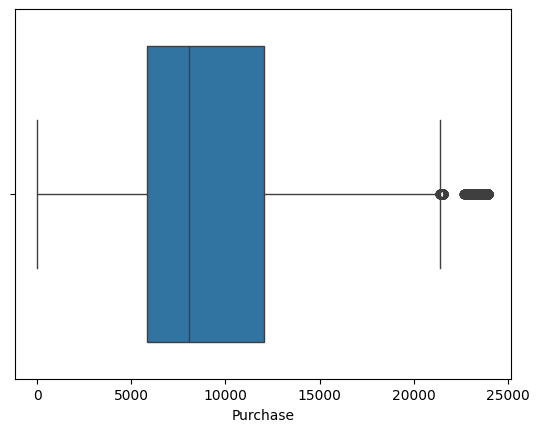

In [ ]:
sns.boxplot(daf['Purchase'],orient='h')
plt.show()

In [ ]:
daf['Purchase'].describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


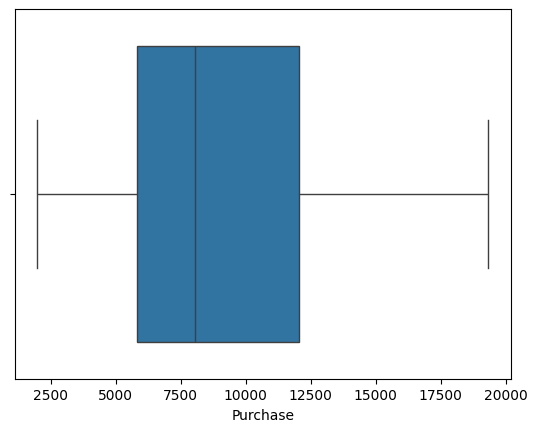

In [ ]:
df=daf.copy()
purchase_5th=df['Purchase'].quantile(0.05)
purchase_95th=df['Purchase'].quantile(0.95)
df['Purchase'].clip(purchase_5th,purchase_95th,inplace=True)
sns.boxplot(df['Purchase'],orient='h')
plt.show()

## Observations on Outlier Detection and Clipping
*   The box plot of the Purchase column indicates the presence of outliers, specially on the higher end of purchase amounts.
*   The descriptive statistics for Purchase  show a maximum value of 23961, which is significantly higher than the 75th percentile (12054), further suggesting outliers.
*   Instead of removal, the data is **clipped** at the 5th and 95th percentiles in a copied DataFrame (df_copy). This approach retains all data points but limits the influence of extreme values by capping them at a certain threshold..
*   For User_ID and Product_ID, outlier detection and clipping are not relevant as they are unique identifiers without analytical significance.

# **Bivariate Analysis**

##Preference of Product category by different Genders

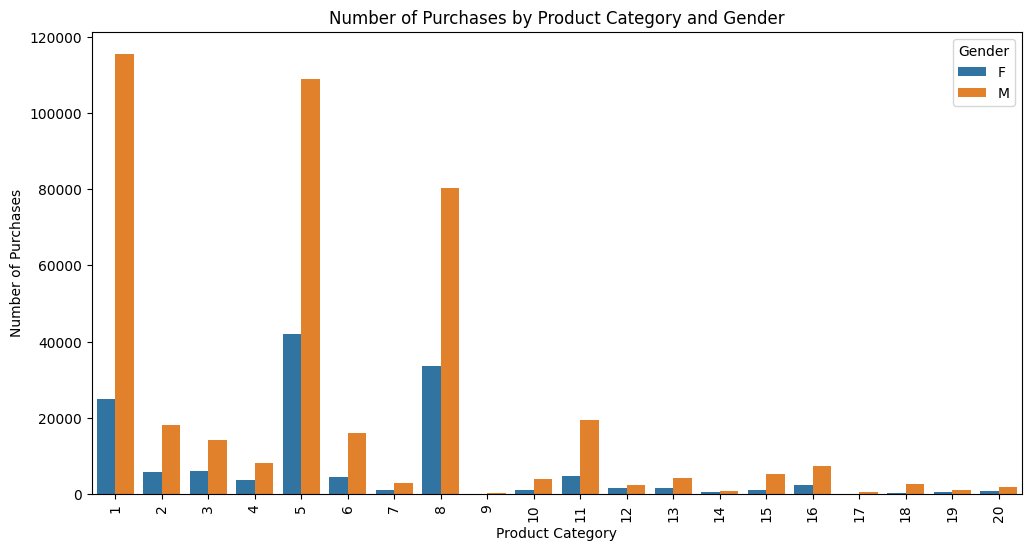

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product_Category', hue='Gender')
plt.title('Number of Purchases by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=90)
plt.show()

In [ ]:
for gen in df['Gender'].unique():
    print(f"\nProduct Category counts for Gender: {gen}")
    gen_df = df[df['Gender'] == gen]
    product_category_counts = gen_df['Product_Category'].value_counts()
    print(product_category_counts.head())


Product Category counts for Gender: F
Product_Category
5    41961
8    33558
1    24831
3     6006
2     5658
Name: count, dtype: int64

Product Category counts for Gender: M
Product_Category
1     115547
5     108972
8      80367
11     19548
2      18206
Name: count, dtype: int64


##Preference of Product category by different age Groups

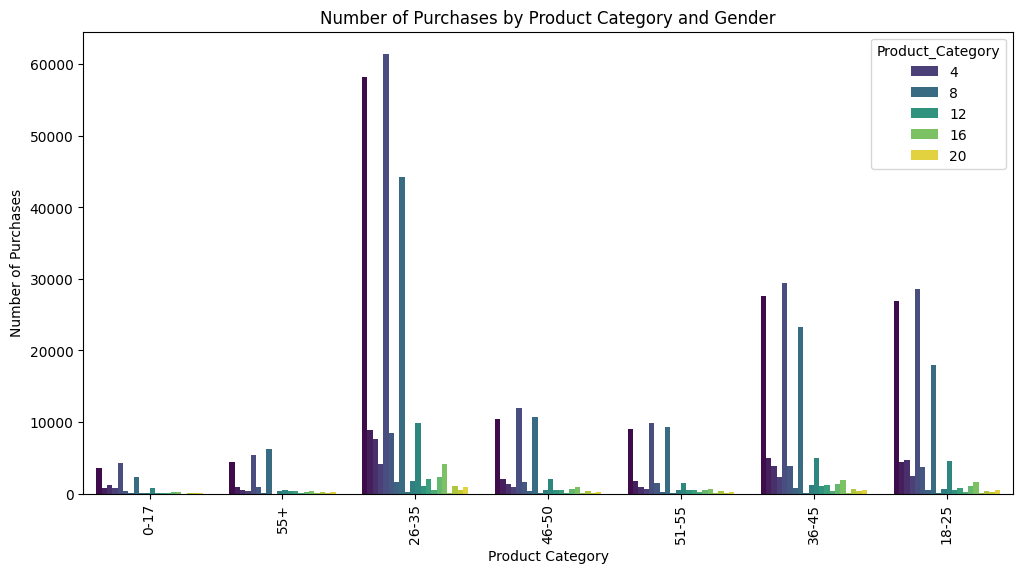

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age', hue='Product_Category',palette='viridis')
plt.title('Number of Purchases by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=90)
plt.show()

In [ ]:
for age_group in df['Age'].unique():
    print(f"\nProduct Category counts for Age group: {age_group}")
    age_group_df = df[df['Age'] == age_group]
    product_category_counts = age_group_df['Product_Category'].value_counts()
    print(product_category_counts.head()) # Displaying head for brevity


Product Category counts for Age group: 0-17
Product_Category
5    4330
1    3585
8    2258
3    1200
2     805
Name: count, dtype: int64

Product Category counts for Age group: 55+
Product_Category
8    6208
5    5367
1    4411
2     905
6     862
Name: count, dtype: int64

Product Category counts for Age group: 26-35
Product_Category
5     61473
1     58249
8     44256
11     9874
2      8928
Name: count, dtype: int64

Product Category counts for Age group: 46-50
Product_Category
5     11971
8     10656
1     10474
2      2105
11     2104
Name: count, dtype: int64

Product Category counts for Age group: 51-55
Product_Category
5     9893
8     9340
1     9049
2     1781
11    1458
Name: count, dtype: int64

Product Category counts for Age group: 36-45
Product_Category
5     29377
1     27648
8     23296
11     4953
2      4912
Name: count, dtype: int64

Product Category counts for Age group: 18-25
Product_Category
5     28522
1     26962
8     17911
3      4710
11     4597
Name: count

### Observations on Product Category Preferences by Gender and Age

*   **Overall Popular Categories:** Product Categories **5, 1, and 8** are the most frequently purchased categories across the entire dataset.
*   **Gender Preferences:**
    *   For **Females**, Product Category **5** is the most preferred, followed by 8 and 1.
    *   For **Males**, Product Category **1** is the most preferred, followed by 5 and 8.
    *   While both genders show high interest in categories 1, 5, and 8, their ranking of preference for these top categories differs.
*   **Age Group Preferences:**
    *   Product Categories **5, 1, and 8** are generally among the top preferred categories across **most age groups**.
    *   Specific rankings within these top categories can vary by age group. For example, Product Category 5 is the most preferred for age groups 0-17, 26-35, 36-45, 46-50, and 51-55, while Product Category 1 is the most preferred for the 18-25 age group.
    *   Product Category 8 is the most preferred for the 55+ age group. Hence, there are some distinct preferences too.
    *   Other product categories show varying levels of popularity across different age groups.



# **Multivariate Analysis**

In [ ]:
df.groupby(['Gender','Age'])['Purchase'].mean().sort_values(ascending=False)

Gender  Age  
M       51-55    9683.881812
        36-45    9441.709728
        18-25    9434.317225
        55+      9431.482248
        26-35    9399.496011
        46-50    9349.894776
        0-17     9233.337958
F       51-55    9026.171720
        55+      8992.832382
        36-45    8960.730548
        46-50    8845.472309
        26-35    8725.765211
        0-17     8363.735786
        18-25    8360.725353
Name: Purchase, dtype: float64

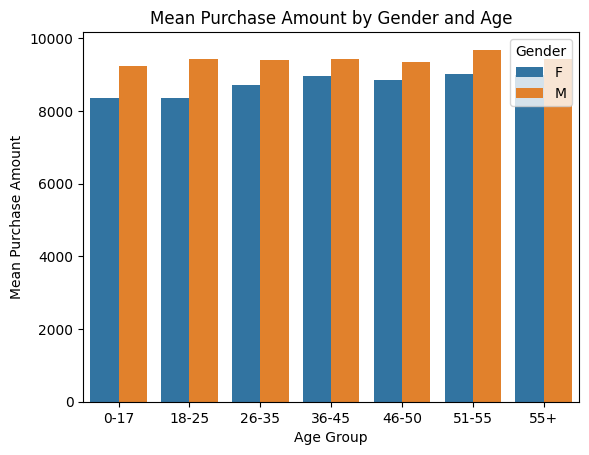

In [ ]:
gender_age_purchase = df.groupby(['Gender', 'Age'])['Purchase'].mean().reset_index()
sns.barplot(data=gender_age_purchase, x='Age', y='Purchase', hue='Gender')
plt.title('Mean Purchase Amount by Gender and Age')
plt.xlabel('Age Group')
plt.ylabel('Mean Purchase Amount')
plt.show()

## Observations on Mean Purchase Amount by Gender and Age

Based on the multivariate analysis of mean purchase amount by Gender and Age:

*   **Gender Difference:** Across all age groups, **males consistently have a higher average purchase amount** compared to females.
*   **Highest Spending Groups:**
    *   For **Males**, the **51-55** age group shows the highest average purchase amount.
    *   For **Females**, the **51-55** age group also shows the highest average purchase amount.
*   **Lowest Spending Groups:**
    *   For **Males**, the **0-17** age group has the lowest average purchase amount.
    *   For **Females**, both the **0-17** and **18-25** age groups have the lowest average purchase amounts, which are quite similar.
*   **Age Trend:** While there isn't a perfectly linear trend, the average purchase amount generally appears to be lower in the youngest age groups (0-17, 18-25) for both genders and tends to be higher in the older age groups, peaking around 51-55.
*   **Consistent Pattern:** The pattern of how average purchase amount changes with age seems somewhat similar for both genders, although males consistently spend more on average at each age level.


#**Gender and Purchases**


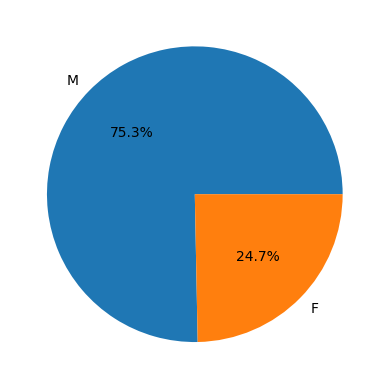

In [ ]:
plt.pie(df['Gender'].value_counts().values,labels=df['Gender'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [ ]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8736.540266,4596.984614,1984.0,5433.0,7914.0,11400.0,19336.0
M,414259.0,9427.240997,4925.953492,1984.0,5863.0,8098.0,12454.0,19336.0


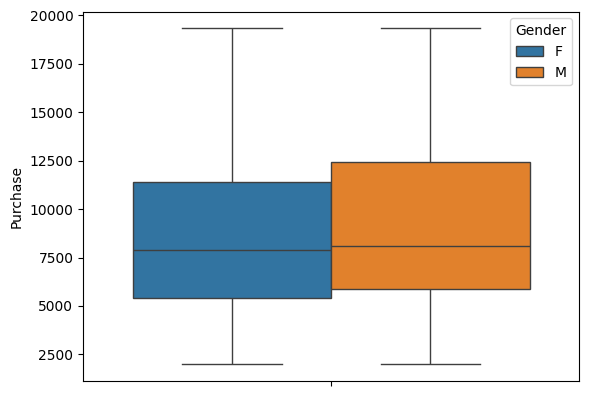

In [ ]:
sns.boxplot(data=df,y='Purchase',hue='Gender')
plt.show()

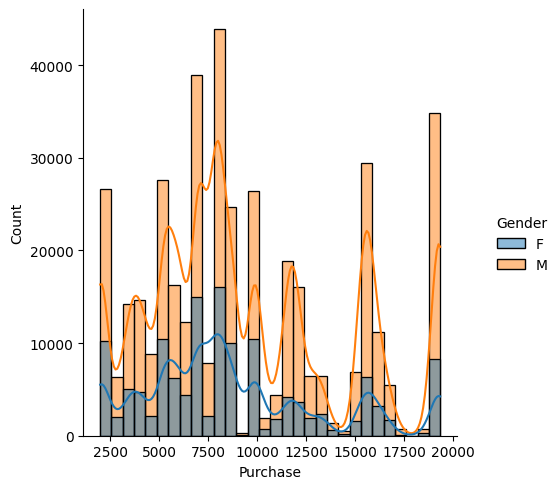

In [ ]:
sns.displot(data=df,x='Purchase',hue='Gender',bins=30,kde=True)
plt.show()

### Observations on Purchase Amount Distribution by Gender

*   **Gender Distribution:** The dataset is heavily skewed towards **Male** users, who constitute a significantly larger proportion of the dataset compared to Female users .
*   **Descriptive Statistics:**
    *   The **mean purchase amount for Males is higher** (approx. 9427) than for Females (approx. 8737).
    *   The standard deviation for Males is also slightly higher than for Females, suggesting a bit more variability in male purchase amounts.
    *   The minimum and maximum purchase amounts are the same for both genders after clipping (1984.0 to 19336.0).
*   **Distribution Shape:** The box plot and the histogram/displot show that the distribution of purchase amounts for both genders appears somewhat similar in shape, although the distribution for males is shifted slightly towards higher purchase amounts compared to females. Both distributions show some degree of right skewness.


In [ ]:
dfm=df[df['Gender']=='M']
dff=df[df['Gender']=='F']


In [ ]:
def bootstrapping_fun(data, sample_size, iterations, alpha, category):
  bootstrapped_means=[]
  for i in range(iterations):
    x=np.mean(data.sample(sample_size, replace=True)['Purchase'])
    bootstrapped_means.append(x)
  return bootstrapped_means

In [ ]:
def calculate_ci(data, sample_size, iterations, alpha, category):
  bootstrapped_means=bootstrapping_fun(data, sample_size, iterations, alpha, category)
  mu=np.mean(bootstrapped_means)
  sigma=np.std(bootstrapped_means)
  lower_bound=(100-alpha)/2
  upper_bound=(100+alpha)/2
  x1=np.percentile(bootstrapped_means,lower_bound)
  x2=np.percentile(bootstrapped_means,upper_bound)
  print(f"Confidence Interval for average amount spent by '{category}' with sample size {sample_size} and {alpha}% confidence: ({x1},{x2})")
  return

In [ ]:
def hist_fun(data, sample_size, iterations, alpha, category):
  means_series=bootstrapping_fun(data, sample_size, iterations, alpha, category)
  print(f'Category:{category}\nSample Size:{sample_size}\nConfidence level:{alpha}% \n')
  sns.histplot(means_series,kde=True)
  plt.show()
  return

##Female Purchases

Effect of Sample Size on Confidence Interval

In [ ]:
for i in [300,3000,30000,len(dff)]:
    calculate_ci(dff, i, 1000, 95, 'Female')

Confidence Interval for average amount spent by 'Female' with sample size 300 and 95% confidence: (8234.337416666665,9300.8895)
Confidence Interval for average amount spent by 'Female' with sample size 3000 and 95% confidence: (8581.715758333334,8891.301833333335)
Confidence Interval for average amount spent by 'Female' with sample size 30000 and 95% confidence: (8687.970248333333,8784.780588333333)
Confidence Interval for average amount spent by 'Female' with sample size 135809 and 95% confidence: (8736.540266109021,8736.540266109021)


Effect of Confidence levels on Confidence Intervals

In [ ]:
for j in [90,95,99]:
    calculate_ci(dff, 30000, 1000, j, 'Female')

Confidence Interval for average amount spent by 'Female' with sample size 30000 and 90% confidence: (8696.25203,8774.376255000001)
Confidence Interval for average amount spent by 'Female' with sample size 30000 and 95% confidence: (8693.332914166665,8780.807329166666)
Confidence Interval for average amount spent by 'Female' with sample size 30000 and 99% confidence: (8684.552508666666,8808.186227333334)


Effect of Sample Size on Distribution


Category:Female
Sample Size:300
Confidence level:95% 



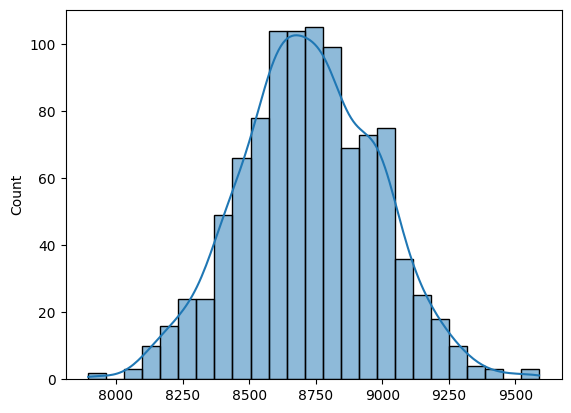

Category:Female
Sample Size:3000
Confidence level:95% 



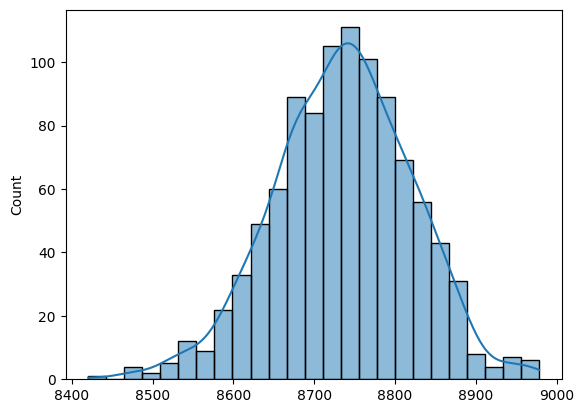

Category:Female
Sample Size:30000
Confidence level:95% 



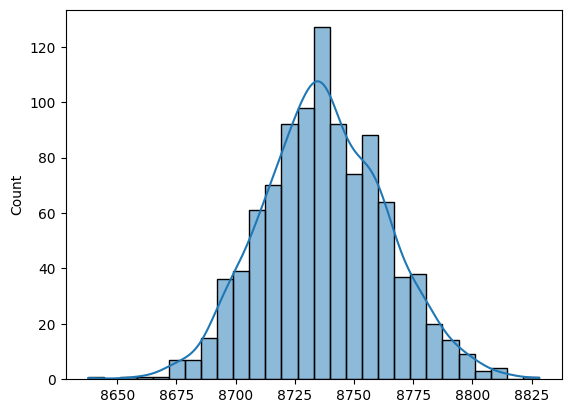

Category:Female
Sample Size:135809
Confidence level:95% 



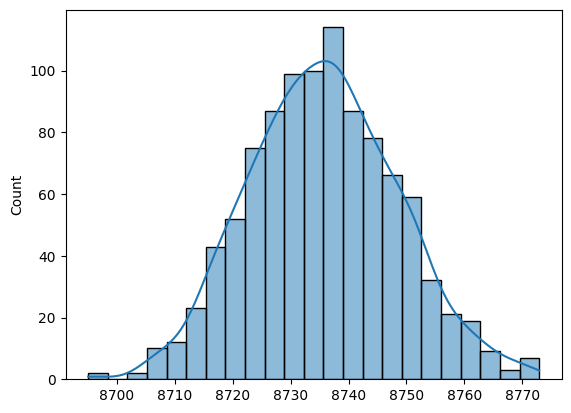

In [ ]:
for i in [300,3000,30000,len(dff)]:
    hist_fun(dff, i, 1000, 95, 'Female')

Effect of Confidence levels on Distribution

Category:Female
Sample Size:30000
Confidence level:90% 



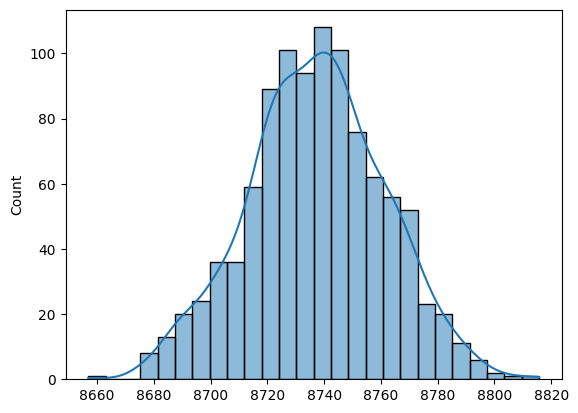

Category:Female
Sample Size:30000
Confidence level:95% 



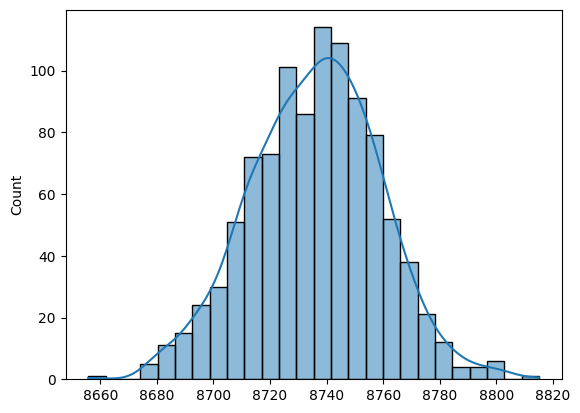

Category:Female
Sample Size:30000
Confidence level:99% 



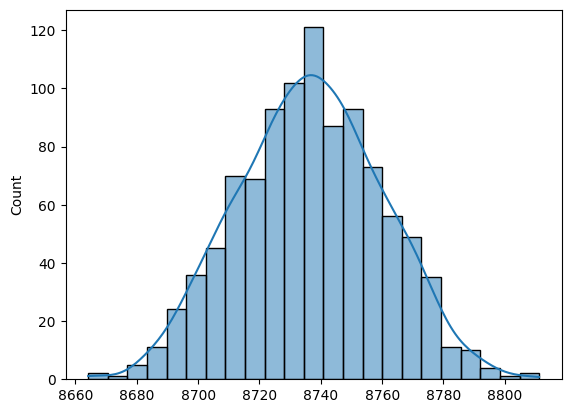

In [ ]:
for j in [90,95,99]:
    hist_fun(dff, 30000, 1000, j, 'Female')

## Observations on Bootstrapping of Female Purchase Amount:

*   **Bootstrapping Process:** The code implements a bootstrapping process by repeatedly drawing random samples with replacement from the female purchase amounts. For each sample, the mean purchase amount is calculated, and these means are collected to form an empirical distribution of sample means.
*   **Confidence Intervals:** Confidence intervals for the average female purchase amount were calculated based on the percentiles of the bootstrap sample means for various sample sizes and confidence levels.
*   **Effect of Sample Size on CI Width:** As the sample size increases (from 300 to 3000, 30000, and the full dataset size), the width of the confidence interval for the average female purchase amount decreases. This indicates that larger sample sizes provide a more precise estimate of the population mean, therefore narrower interval.
*   **Effect of Confidence Level on CI Width:** As the confidence level increases for a fixed sample size, the width of the confidence interval increases.
*   **Distribution of Sample Means:** The histograms of the bootstrap sample means show that as the sample size increases, the distribution of sample means becomes more symmetrical and more closely approximates a normal distribution, and its spread decreases. This visually confirms the principles of the **Central Limit Theorem**.



##Male Purchases

Effect of Sample Size on Confidence Interval


In [ ]:
for i in [300,3000,30000,len(dfm)]:
    calculate_ci(dfm, i, 1000, 95, 'Male')

Confidence Interval for average amount spent by 'Male' with sample size 300 and 95% confidence: (8863.186916666666,9951.436249999999)
Confidence Interval for average amount spent by 'Male' with sample size 3000 and 95% confidence: (9260.701633333334,9594.709383333333)
Confidence Interval for average amount spent by 'Male' with sample size 30000 and 95% confidence: (9370.909804166666,9483.837184166667)
Confidence Interval for average amount spent by 'Male' with sample size 414259 and 95% confidence: (9412.185521919862,9443.15903939323)


Effect of Confidence levels on Confidence Intervals


In [ ]:
for j in [90,95,99]:
    calculate_ci(dfm, 30000, 1000, j, 'Male')

Confidence Interval for average amount spent by 'Male' with sample size 30000 and 90% confidence: (9381.426876666666,9472.45907)
Confidence Interval for average amount spent by 'Male' with sample size 30000 and 95% confidence: (9370.331525833333,9481.521923333334)
Confidence Interval for average amount spent by 'Male' with sample size 30000 and 99% confidence: (9356.635750166666,9500.416681)


Effect of Sample Size on Distribution


Category:Male
Sample Size:300
Confidence level:95% 



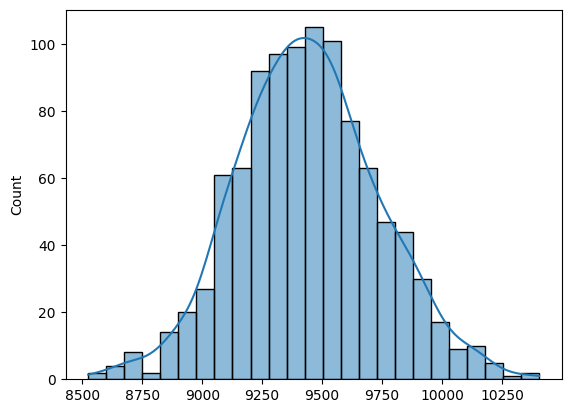

Category:Male
Sample Size:3000
Confidence level:95% 



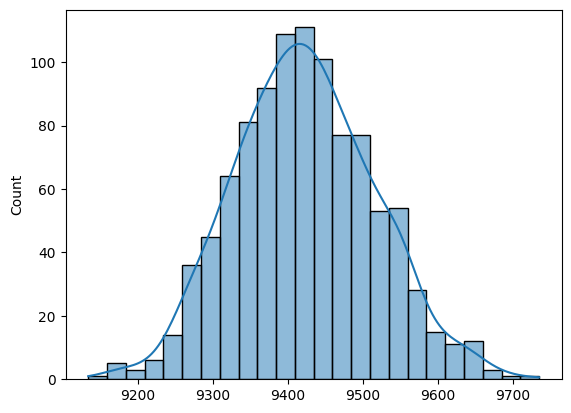

Category:Male
Sample Size:30000
Confidence level:95% 



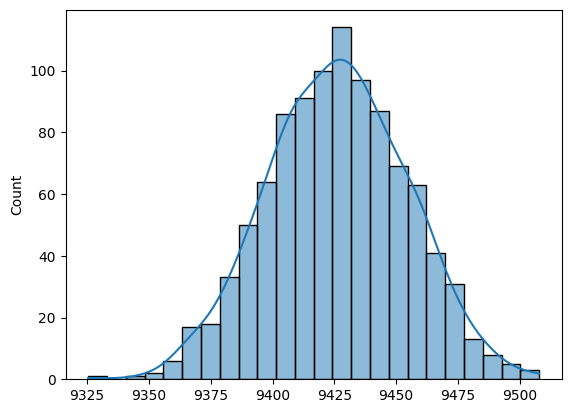

Category:Male
Sample Size:414259
Confidence level:95% 



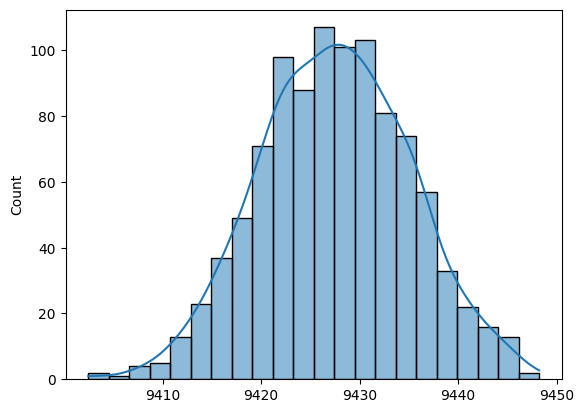

In [ ]:
for i in [300,3000,30000,len(dfm)]:
    hist_fun(dfm, i, 1000, 95, 'Male')

Effect of Confidence levels on Distribution

Category:Male
Sample Size:30000
Confidence level:90% 



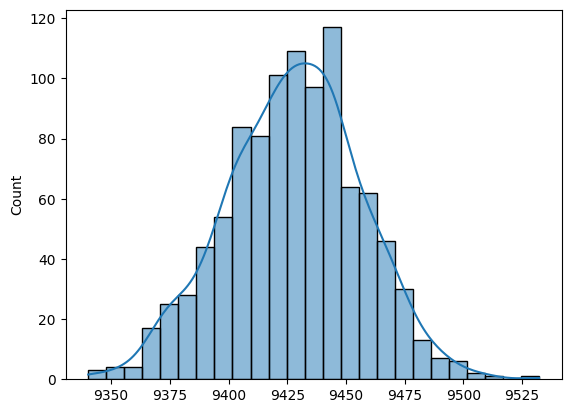

Category:Male
Sample Size:30000
Confidence level:95% 



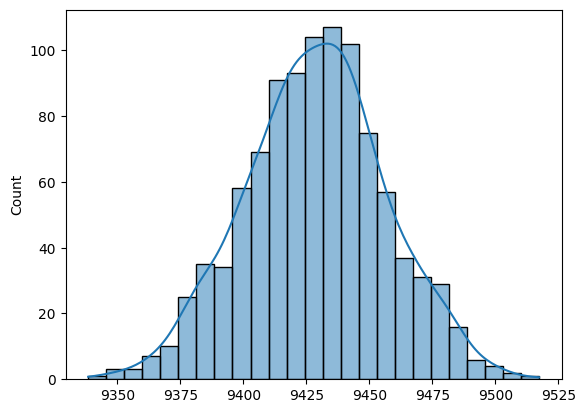

Category:Male
Sample Size:30000
Confidence level:99% 



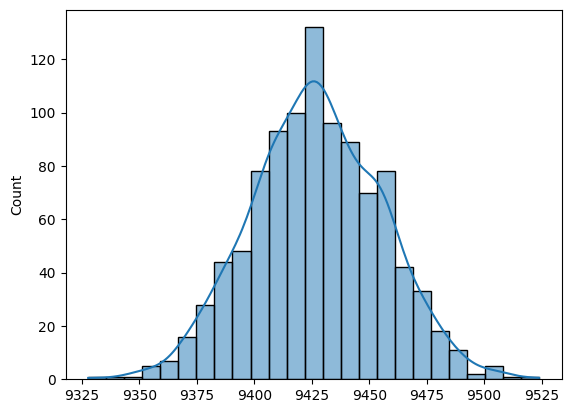

In [ ]:
for j in [90,95,99]:
    hist_fun(dfm, 30000, 1000, j, 'Male')

## Observations on Bootstrapping of Male Purchase Amount:

*   **Bootstrapping Process:** The code implements a bootstrapping process by repeatedly drawing random samples with replacement from the male purchase amounts. For each sample, the mean purchase amount is calculated, and these means are collected to form an empirical distribution of sample means.
*   **Confidence Intervals:** Confidence intervals for the average male purchase amount were calculated based on the percentiles of the bootstrap sample means for various sample sizes and confidence levels.
*   **Effect of Sample Size on CI Width:** As the sample size increases (from 300 to 3000, 30000, and the full dataset size), the width of the confidence interval for the average male purchase amount decreases. This indicates that larger sample sizes provide a more precise estimate of the population mean, therefore narrower interval.
*   **Effect of Confidence Level on CI Width:** As the confidence level increases for a fixed sample size, the width of the confidence interval increases.
*   **Distribution of Sample Means:** The histograms of the bootstrap sample means show that as the sample size increases, the distribution of sample means becomes more symmetrical and more closely approximates a normal distribution, and its spread decreases. This visually confirms the principles of the **Central Limit Theorem**.



##Comparison Male Vs Female

In [ ]:
calculate_ci(dfm, len(dfm), 1000, 95, 'Male')
calculate_ci(dff, len(dff), 1000, 95, 'Female')

Confidence Interval for average amount spent by 'Male' with sample size 414259 and 95% confidence: (9412.693011920079,9442.421250111645)
Confidence Interval for average amount spent by 'Female' with sample size 135809 and 95% confidence: (8712.815982372304,8761.71256452076)


## Comparison of Average Purchase Amount: Male vs. Female


*   The 95% confidence interval for the average purchase amount for **Males** is approximately **(9412.69, 9442.42)**.
*   The 95% confidence interval for the average purchase amount for **Females** is approximately **(8712.82, 8761.71)**.

**Observation on Overlap:** These two confidence intervals **do not overlap**. The upper bound of the confidence interval for females (8761.71) is lower than the lower bound of the confidence interval for males (9412.69).

**Interpretation:** Since the 95% confidence intervals for the average purchase amount of males and females do not overlap, it suggests that there is a **statistically significant difference** in the true average purchase amount between the population of male and female customers at the 95% confidence level.
* Moreover, we can be 95% confident that the true average purchase amount for males in the population is higher than that for females.

#**Marital Status and Purchases**

In [ ]:
df['Marital_Status'].replace({0:'Unmarried',1:'Married'},inplace=True)

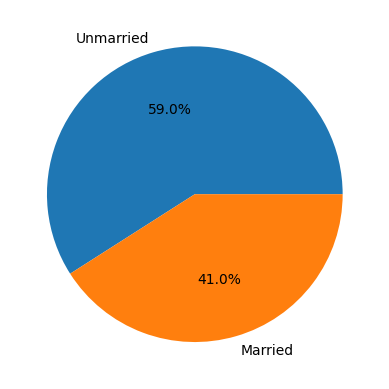

In [ ]:
plt.pie(df['Marital_Status'].value_counts().values,labels=df['Marital_Status'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [ ]:
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Married,225337.0,9253.669823,4843.486447,1984.0,5843.0,8051.0,12042.0,19336.0
Unmarried,324731.0,9258.820464,4864.581471,1984.0,5605.0,8044.0,12061.0,19336.0


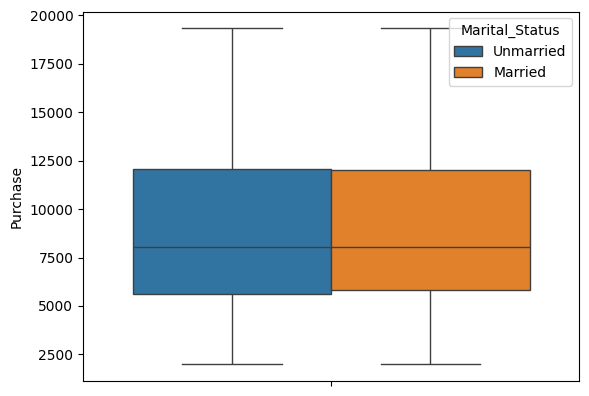

In [ ]:
sns.boxplot(data=df,y='Purchase',hue='Marital_Status')
plt.show()

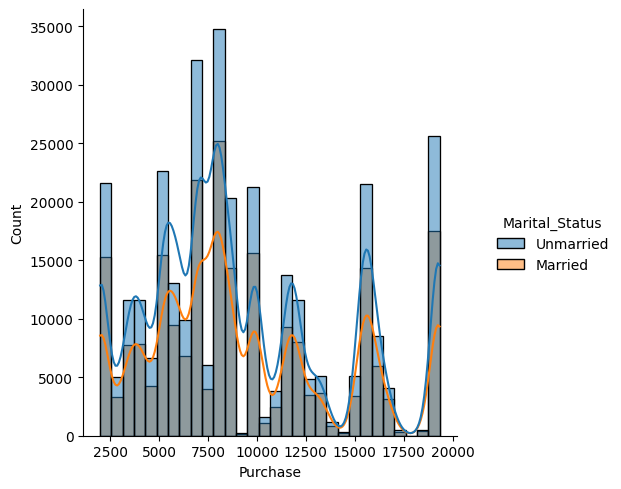

In [ ]:
sns.displot(data=df,x='Purchase',hue='Marital_Status',bins=30,kde=True)
plt.show()

In [ ]:
dfc=df[df['Marital_Status']=='Married']
dfs=df[df['Marital_Status']=='Unmarried']

##Purchases of Married

Effect of Sample Size on Confidence Interval


In [ ]:
for i in [300,3000,30000,len(dfc)]:
    calculate_ci(dfc, i, 1000, 95, 'Married')

Confidence Interval for average amount spent by 'Married' with sample size 300 and 95% confidence: (8729.199666666667,9787.87525)
Confidence Interval for average amount spent by 'Married' with sample size 3000 and 95% confidence: (9077.727958333333,9416.145933333333)
Confidence Interval for average amount spent by 'Married' with sample size 30000 and 95% confidence: (9197.771341666667,9304.710738333333)
Confidence Interval for average amount spent by 'Married' with sample size 225337 and 95% confidence: (9233.57836163169,9272.20008331965)


Effect of Confidence levels on Confidence Intervals


In [ ]:
for j in [90,95,99]:
    calculate_ci(dfc, 30000, 1000, j, 'Married')

Confidence Interval for average amount spent by 'Married' with sample size 30000 and 90% confidence: (9205.308840000002,9299.516118333333)
Confidence Interval for average amount spent by 'Married' with sample size 30000 and 95% confidence: (9199.195754999999,9305.351804166667)
Confidence Interval for average amount spent by 'Married' with sample size 30000 and 99% confidence: (9182.679730833333,9326.9506585)


Effect of Sample Size on Distribution


Category:Married
Sample Size:300
Confidence level:95% 



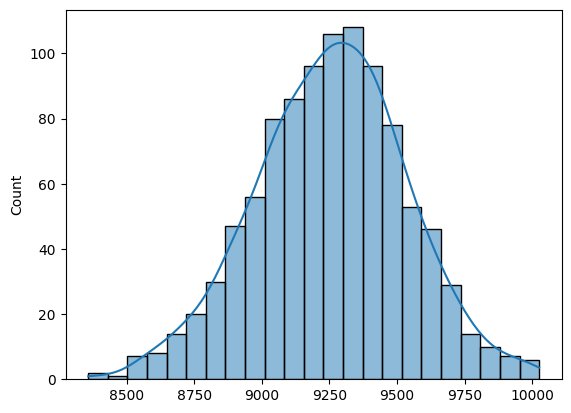

Category:Married
Sample Size:3000
Confidence level:95% 



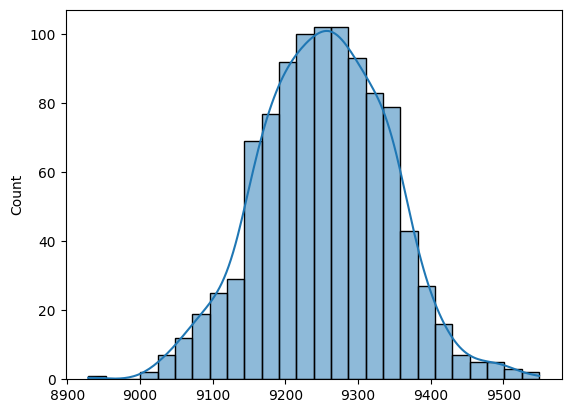

Category:Married
Sample Size:30000
Confidence level:95% 



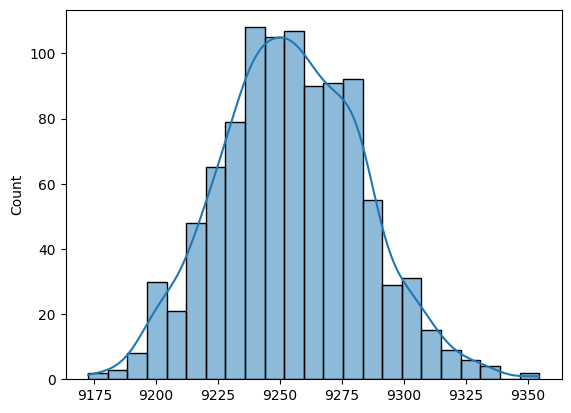

Category:Married
Sample Size:225337
Confidence level:95% 



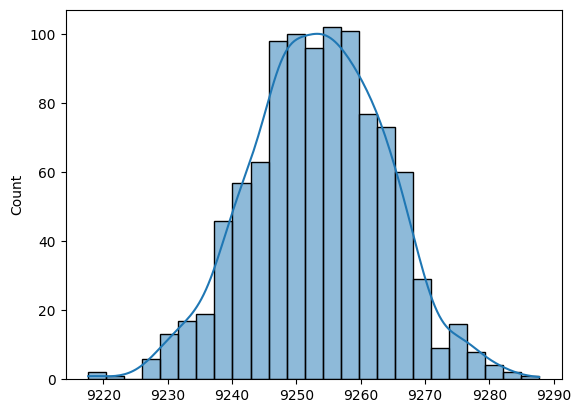

In [ ]:
for i in [300,3000,30000,len(dfc)]:
    hist_fun(dfc, i, 1000, 95, 'Married')

Effect of Confidence levels on Distribution

Category:Married
Sample Size:30000
Confidence level:90% 



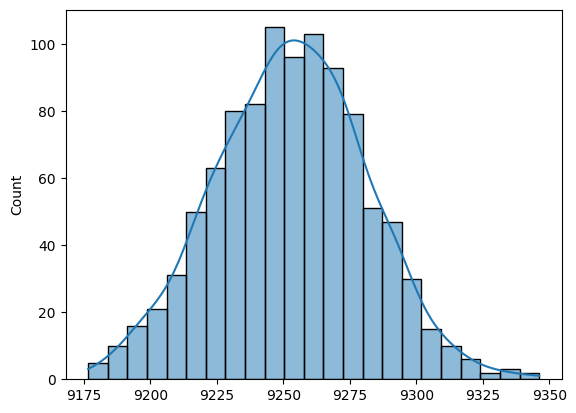

Category:Married
Sample Size:30000
Confidence level:95% 



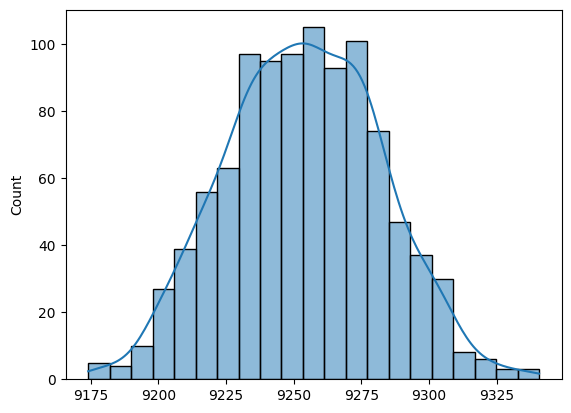

Category:Married
Sample Size:30000
Confidence level:99% 



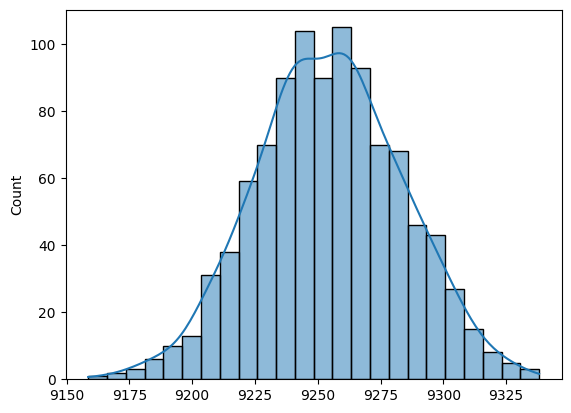

In [ ]:
for j in [90,95,99]:
    hist_fun(dfc, 30000, 1000, j, 'Married')

##Purchases of Unmarried

Effect of Sample Size on Confidence Interval


In [ ]:
for i in [300,3000,30000,len(dfs)]:
    calculate_ci(dfs, i, 1000, 95, 'Unmarried')

Confidence Interval for average amount spent by 'Unmarried' with sample size 300 and 95% confidence: (8735.298333333334,9844.163583333333)
Confidence Interval for average amount spent by 'Unmarried' with sample size 3000 and 95% confidence: (9076.251683333332,9426.332591666665)
Confidence Interval for average amount spent by 'Unmarried' with sample size 30000 and 95% confidence: (9206.793703333333,9316.1457225)
Confidence Interval for average amount spent by 'Unmarried' with sample size 324731 and 95% confidence: (9242.97626674078,9275.906615244618)


Effect of Confidence levels on Confidence Intervals


In [ ]:
for j in [90,95,99]:
    calculate_ci(dfs, 30000, 1000, j, 'Unmarried')

Confidence Interval for average amount spent by 'Unmarried' with sample size 30000 and 90% confidence: (9210.33447,9302.19665)
Confidence Interval for average amount spent by 'Unmarried' with sample size 30000 and 95% confidence: (9199.6698975,9315.64695)
Confidence Interval for average amount spent by 'Unmarried' with sample size 30000 and 99% confidence: (9185.863287,9329.985764833335)


Effect of Sample Size on Distribution


Category:Unmarried
Sample Size:300
Confidence level:95% 



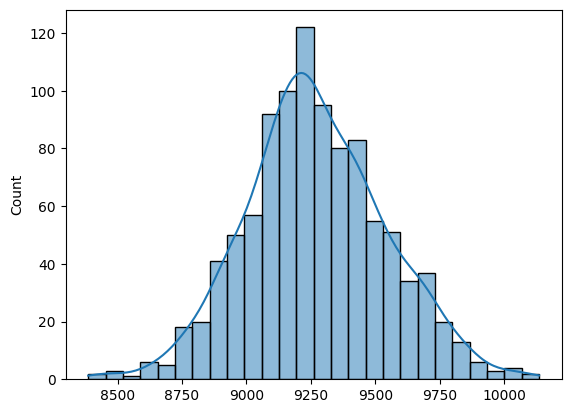

Category:Unmarried
Sample Size:3000
Confidence level:95% 



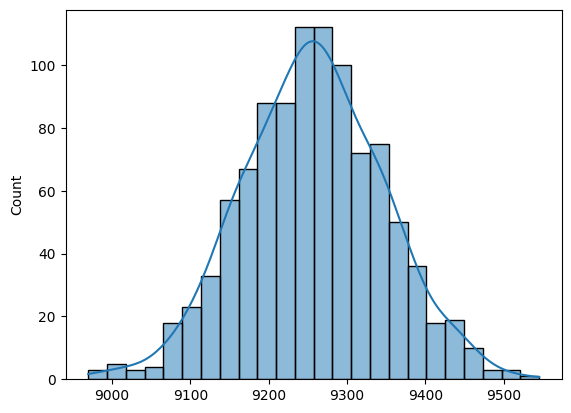

Category:Unmarried
Sample Size:30000
Confidence level:95% 



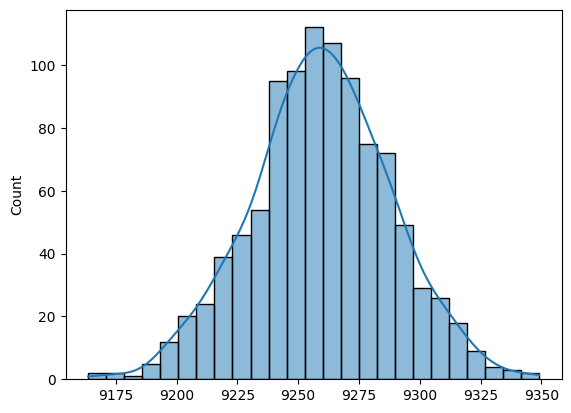

Category:Unmarried
Sample Size:324731
Confidence level:95% 



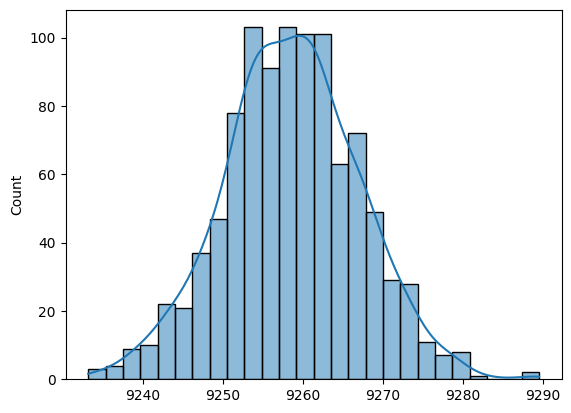

In [ ]:
for i in [300,3000,30000,len(dfs)]:
    hist_fun(dfs, i, 1000, 95, 'Unmarried')

Effect of Confidence levels on Distribution

Category:Unmarried
Sample Size:30000
Confidence level:90% 



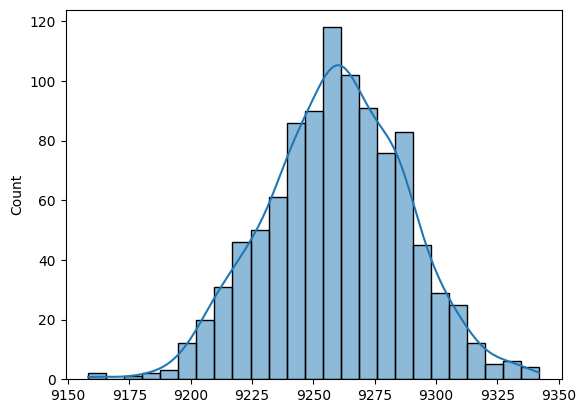

Category:Unmarried
Sample Size:30000
Confidence level:95% 



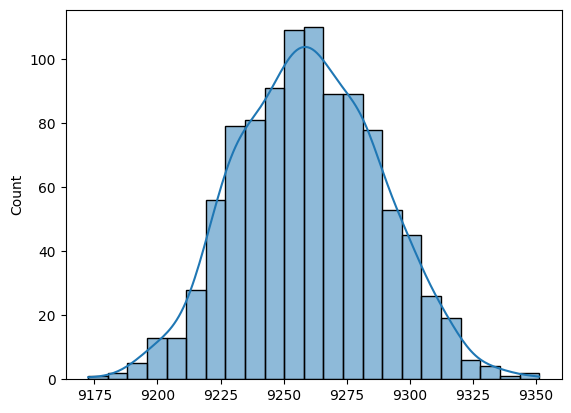

Category:Unmarried
Sample Size:30000
Confidence level:99% 



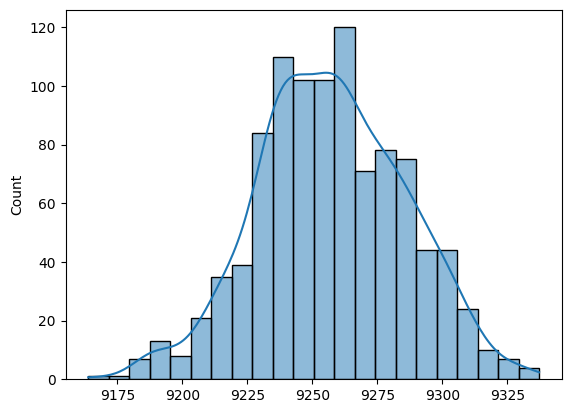

In [ ]:
for j in [90,95,99]:
    hist_fun(dfs, 30000, 1000, j, 'Unmarried')

##Comparison Married Vs Unmarried Purchases

In [ ]:
calculate_ci(dfc, len(dfc), 1000, 95, 'Married')
calculate_ci(dfs, len(dfs), 1000, 95, 'Unmarried')

Confidence Interval for average amount spent by 'Married' with sample size 225337 and 95% confidence: (9232.353507968066,9274.088602071562)
Confidence Interval for average amount spent by 'Unmarried' with sample size 324731 and 95% confidence: (9241.796807049528,9274.171332502901)


### Observations on Purchase amount of married and unmarried group and comparision

*   **Marital Status Distribution:** The dataset contains more **Unmarried** users making purchases than Married users.
*   **Descriptive Statistics and Distribution:** The descriptive statistics , box plot, and displot/histplot show that:
    *   The **mean purchase amounts for Married and Unmarried users are very close**, with Unmarried users having a slightly higher mean compared to Married users.
    *   The standard deviations, minimums, and maximums are also very similar for both groups after clipping.
    *   The distribution shapes of purchase amounts for both Married and Unmarried users are quite similar.
*   **Bootstrapping Analysis (Individual Groups):** Similar to the Gender analysis, the bootstrapping performed on both Married and Unmarried purchase data for various sample sizes (300, 3000, 30000, full dataset) and confidence levels (90%, 95%, 99%) demonstrates the principles of the Central Limit Theorem and how sample size and confidence level affect the confidence interval width and the distribution of sample means.
* As sample size increases, the CI width decreases and the sample mean distribution becomes more normal and less spread. As confidence level increases, the CI width increases.
*   **Comparison of Average Purchase Amount (Married vs. Unmarried):** Based on the 95% confidence intervals for the average amount spent by Married and Unmarried customers, computed using the entire dataset:
    *   The 95% confidence interval for the average purchase amount for **Married** users is approximately **(9232.35, 9274.09)**.
    *   The 95% confidence interval for the average purchase amount for **Unmarried** users is approximately **(9241.80, 9274.17)**.
*   **Observation on Overlap:** These two confidence intervals **overlap**. The upper bound of the confidence interval for Married users (9274.09) is greater than the lower bound of the confidence interval for Unmarried users (9241.80), and vice versa.

* It suggests that there is **no statistically significant difference** in the true average purchase amount between the population of Married and Unmarried customers at the 95% confidence level.

#**Age and Purchases**

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

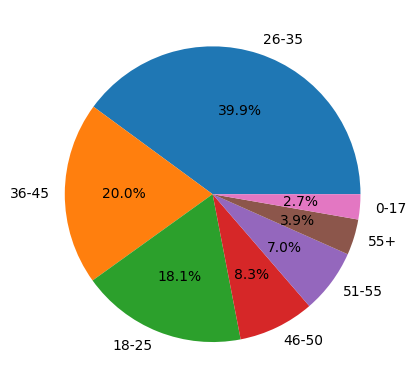

In [ ]:
plt.pie(df['Age'].value_counts().values,labels=df['Age'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [ ]:
df.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8940.649053,4940.597254,1984.0,5328.0,7986.0,11874.0,19336.0
18-25,99660.0,9169.010977,4889.430684,1984.0,5415.0,8027.0,12028.0,19336.0
26-35,219587.0,9243.780119,4855.192053,1984.0,5475.0,8030.0,12047.0,19336.0
36-45,110013.0,9322.921909,4847.597842,1984.0,5876.0,8061.0,12107.0,19336.0
46-50,45701.0,9204.211483,4785.942157,1984.0,5888.0,8036.0,11997.0,19336.0
51-55,38501.0,9514.863250,4873.629668,1984.0,6017.0,8130.0,12462.0,19336.0
55+,21504.0,9327.796549,4779.935889,1984.0,6018.0,8105.5,11932.0,19336.0


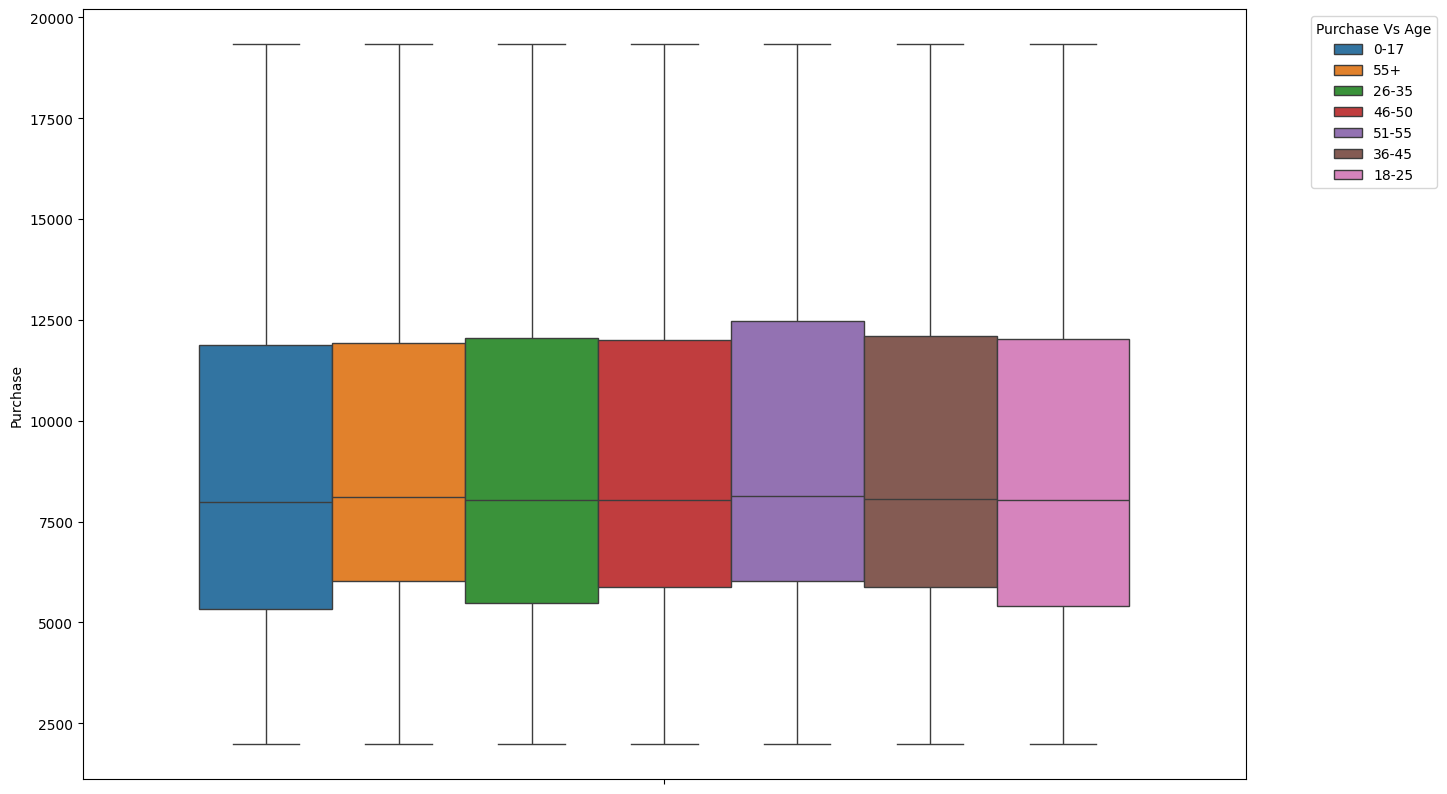

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,y='Purchase',hue='Age')
plt.legend(title='Purchase Vs Age', bbox_to_anchor=(1.05, 1), loc='upper left') # Add legend outside the plot
plt.show()

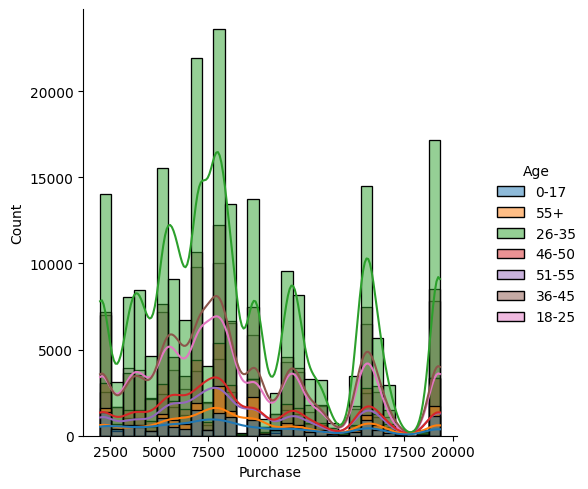

In [ ]:
sns.displot(data=df,x='Purchase',hue='Age',bins=30,kde=True)
plt.show()

In [ ]:
dfa1=df[df['Age']=='0-17']
dfa2=df[df['Age']=='18-25']
dfa3=df[df['Age']=='26-35']
dfa4=df[df['Age']=='36-45']
dfa5=df[df['Age']=='46-50']
dfa6=df[df['Age']=='51-55']
dfa7=df[df['Age']=='55+']


##1.Age group '0-17'

Effect of Sample Size on Confidence Interval


In [ ]:
for i in [300,3000,30000,len(dfa1)]:
    calculate_ci(dfa1, i, 1000, 95, "Age group '0-17'")

Confidence Interval for average amount spent by 'Age group '0-17'' with sample size 300 and 95% confidence: (8375.144333333334,9483.9315)
Confidence Interval for average amount spent by 'Age group '0-17'' with sample size 3000 and 95% confidence: (8768.260666666667,9115.876208333333)
Confidence Interval for average amount spent by 'Age group '0-17'' with sample size 30000 and 95% confidence: (8884.531795833334,8996.984519166666)
Confidence Interval for average amount spent by 'Age group '0-17'' with sample size 15102 and 95% confidence: (8860.728517745994,9016.297960535028)


Effect of Confidence levels on Confidence Intervals


In [ ]:
for j in [90,95,99]:
    calculate_ci(dfa1, 30000, 1000, j, "Age group '0-17'")

Confidence Interval for average amount spent by 'Age group '0-17'' with sample size 30000 and 90% confidence: (8895.347596666667,8986.246374999999)
Confidence Interval for average amount spent by 'Age group '0-17'' with sample size 30000 and 95% confidence: (8883.7227575,8997.648695833333)
Confidence Interval for average amount spent by 'Age group '0-17'' with sample size 30000 and 99% confidence: (8867.243228833333,9014.998429500001)


Effect of Sample Size on Distribution


Category:Age group '0-17'
Sample Size:300
Confidence level:95% 



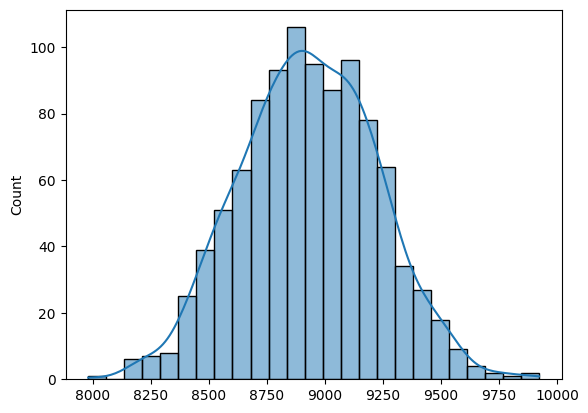

Category:Age group '0-17'
Sample Size:3000
Confidence level:95% 



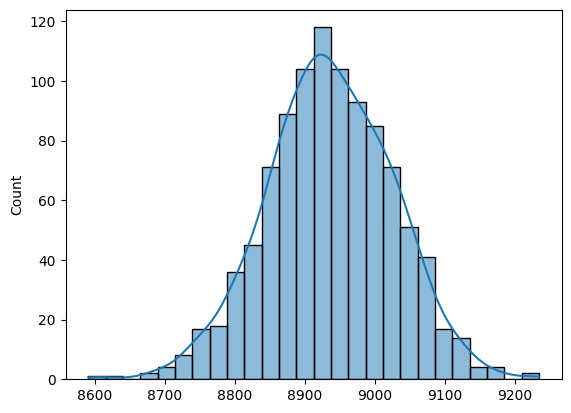

Category:Age group '0-17'
Sample Size:30000
Confidence level:95% 



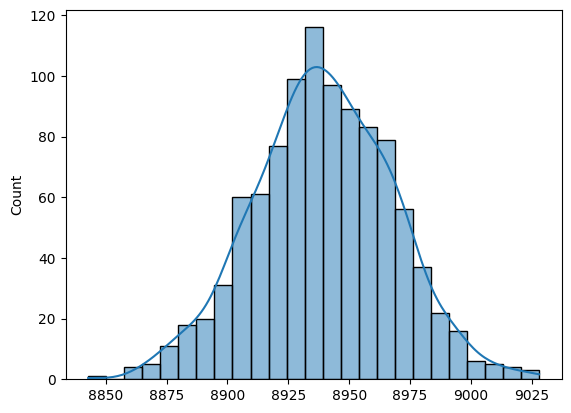

Category:Age group '0-17'
Sample Size:15102
Confidence level:95% 



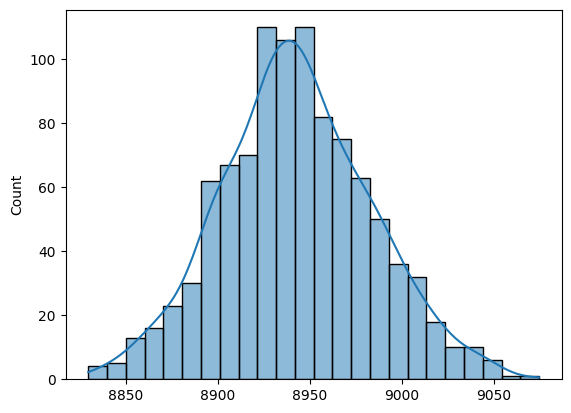

In [ ]:
for i in [300,3000,30000,len(dfa1)]:
    hist_fun(dfa1, i, 1000, 95, "Age group '0-17'")

Effect of Confidence levels on Distribution

Category:Age group '0-17'
Sample Size:30000
Confidence level:90% 



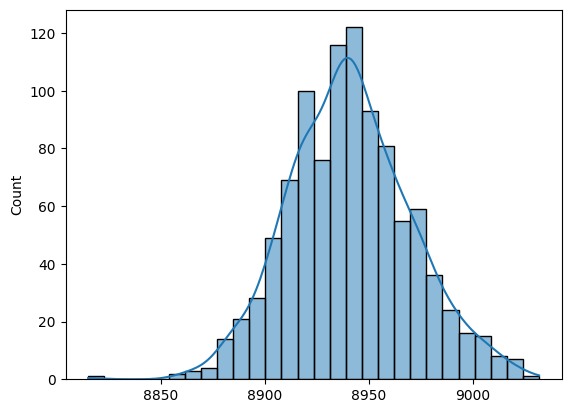

Category:Age group '0-17'
Sample Size:30000
Confidence level:95% 



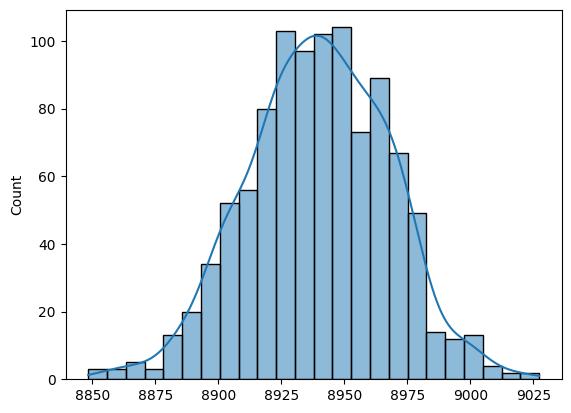

Category:Age group '0-17'
Sample Size:30000
Confidence level:99% 



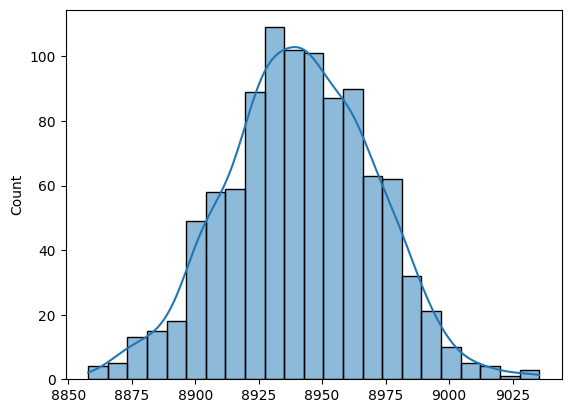

In [ ]:
for j in [90,95,99]:
    hist_fun(dfa1, 30000, 1000, j, "Age group '0-17'")

##2.Age group '18-25'

Effect of Sample Size on Confidence Interval


In [ ]:
for i in [300,3000,30000,len(dfa2)]:
    calculate_ci(dfa2, i, 1000, 95, "Age group '18-25'")

Confidence Interval for average amount spent by 'Age group '18-25'' with sample size 300 and 95% confidence: (8657.235583333333,9725.234333333334)
Confidence Interval for average amount spent by 'Age group '18-25'' with sample size 3000 and 95% confidence: (9000.716583333335,9336.772574999999)
Confidence Interval for average amount spent by 'Age group '18-25'' with sample size 30000 and 95% confidence: (9114.112030833334,9222.458945833334)
Confidence Interval for average amount spent by 'Age group '18-25'' with sample size 99660 and 95% confidence: (9140.149886865343,9199.172594822396)


Effect of Confidence levels on Confidence Intervals


In [ ]:
for j in [90,95,99]:
    calculate_ci(dfa2, 30000, 1000, j, "Age group '18-25'")

Confidence Interval for average amount spent by 'Age group '18-25'' with sample size 30000 and 90% confidence: (9122.153221666667,9213.543384999999)
Confidence Interval for average amount spent by 'Age group '18-25'' with sample size 30000 and 95% confidence: (9113.841536666667,9223.150305833333)
Confidence Interval for average amount spent by 'Age group '18-25'' with sample size 30000 and 99% confidence: (9095.8668855,9239.922626666666)


Effect of Sample Size on Distribution


Category:Age group '18-25'
Sample Size:300
Confidence level:95% 



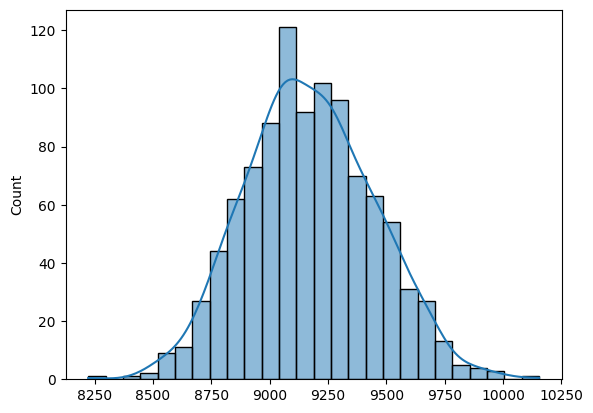

Category:Age group '18-25'
Sample Size:3000
Confidence level:95% 



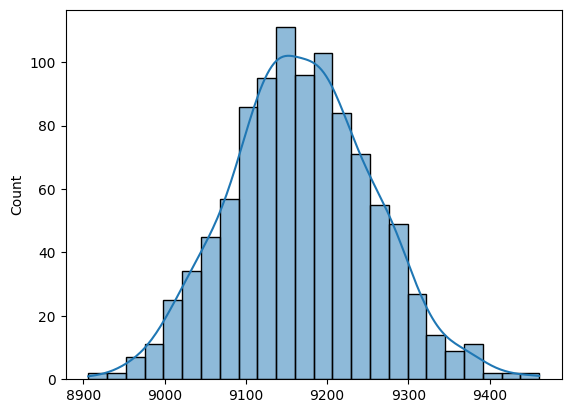

Category:Age group '18-25'
Sample Size:30000
Confidence level:95% 



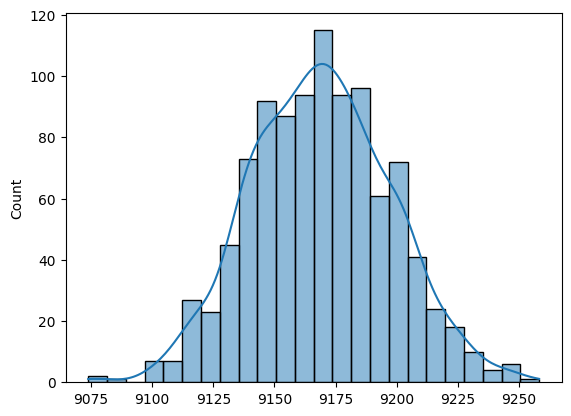

Category:Age group '18-25'
Sample Size:99660
Confidence level:95% 



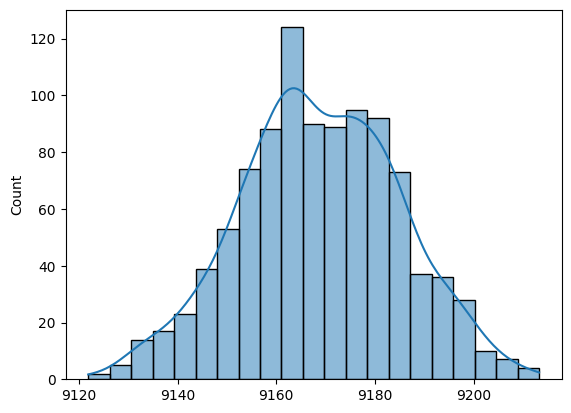

In [ ]:
for i in [300,3000,30000,len(dfa2)]:
    hist_fun(dfa2, i, 1000, 95, "Age group '18-25'")

Effect of Confidence levels on Distribution

Category:Age group '18-25'
Sample Size:30000
Confidence level:90% 



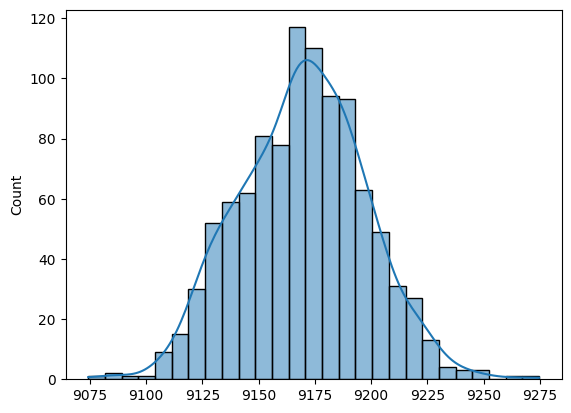

Category:Age group '18-25'
Sample Size:30000
Confidence level:95% 



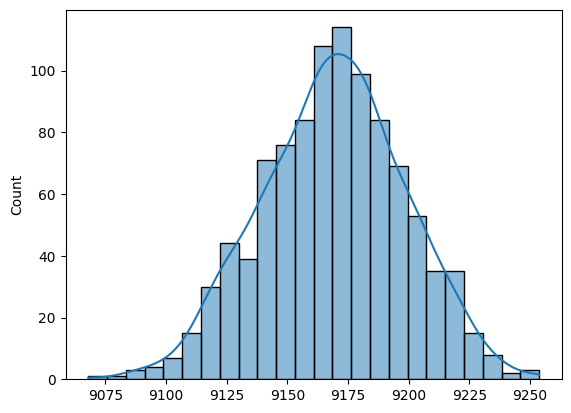

Category:Age group '18-25'
Sample Size:30000
Confidence level:99% 



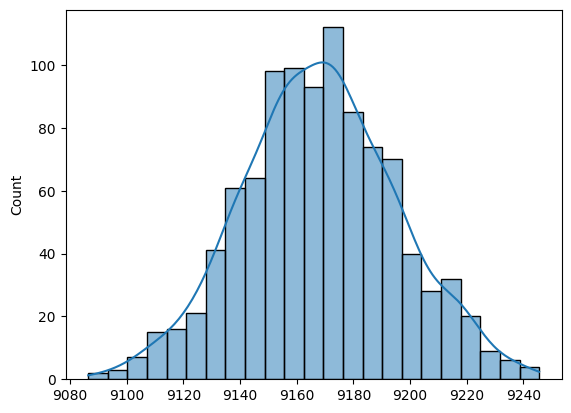

In [ ]:
for j in [90,95,99]:
    hist_fun(dfa2, 30000, 1000, j, "Age group '18-25'")

##3.Age group '26-35'

Effect of Sample Size on Confidence Interval


In [ ]:
for i in [300,3000,30000,len(dfa3)]:
    calculate_ci(dfa3, i, 1000, 95, "Age group '26-35'")

Confidence Interval for average amount spent by 'Age group '26-35'' with sample size 300 and 95% confidence: (8693.107666666667,9771.074083333333)
Confidence Interval for average amount spent by 'Age group '26-35'' with sample size 3000 and 95% confidence: (9064.425025,9425.787858333333)
Confidence Interval for average amount spent by 'Age group '26-35'' with sample size 30000 and 95% confidence: (9188.691911666667,9297.698405000001)
Confidence Interval for average amount spent by 'Age group '26-35'' with sample size 219587 and 95% confidence: (9223.250789322683,9264.052386411764)


Effect of Confidence levels on Confidence Intervals


In [ ]:
for j in [90,95,99]:
    calculate_ci(dfa3, 30000, 1000, j, "Age group '26-35'")

Confidence Interval for average amount spent by 'Age group '26-35'' with sample size 30000 and 90% confidence: (9199.288396666667,9291.552433333334)
Confidence Interval for average amount spent by 'Age group '26-35'' with sample size 30000 and 95% confidence: (9187.364265833334,9296.7802375)
Confidence Interval for average amount spent by 'Age group '26-35'' with sample size 30000 and 99% confidence: (9174.911316333333,9308.661258833334)


Effect of Sample Size on Distribution


Category:Age group '26-35'
Sample Size:300
Confidence level:95% 



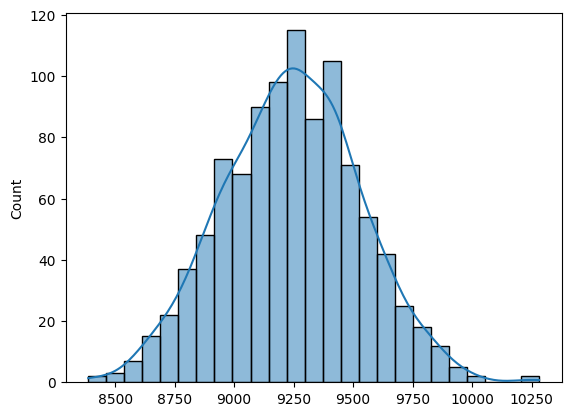

Category:Age group '26-35'
Sample Size:3000
Confidence level:95% 



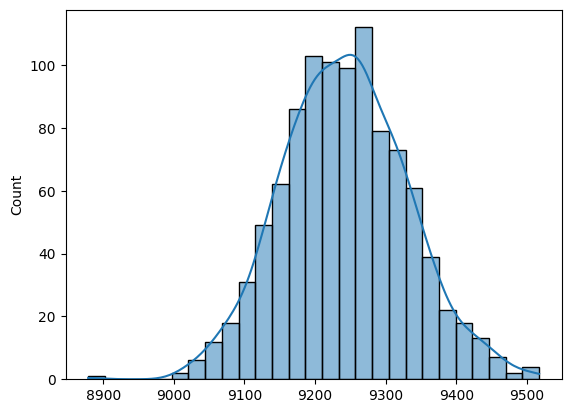

Category:Age group '26-35'
Sample Size:30000
Confidence level:95% 



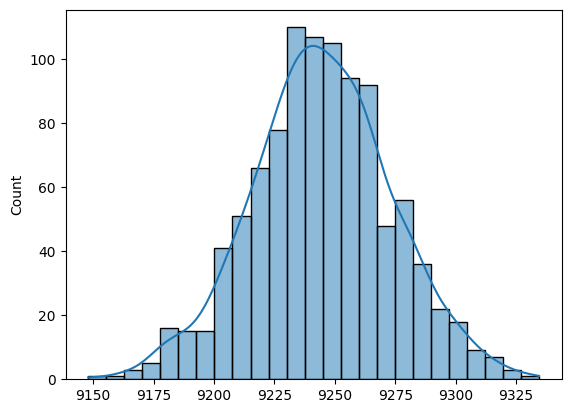

Category:Age group '26-35'
Sample Size:219587
Confidence level:95% 



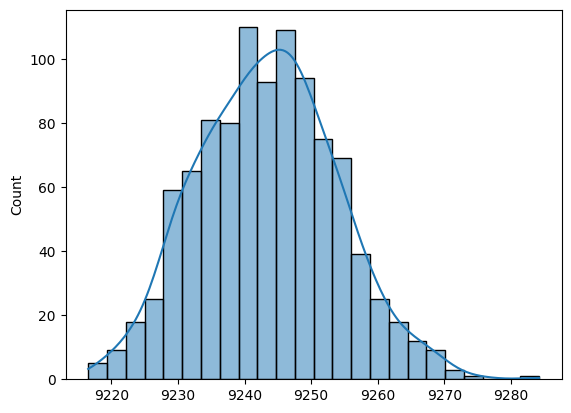

In [ ]:
for i in [300,3000,30000,len(dfa3)]:
    hist_fun(dfa3, i, 1000, 95, "Age group '26-35'")

Effect of Confidence levels on Distribution

Category:Age group '26-35'
Sample Size:30000
Confidence level:90% 



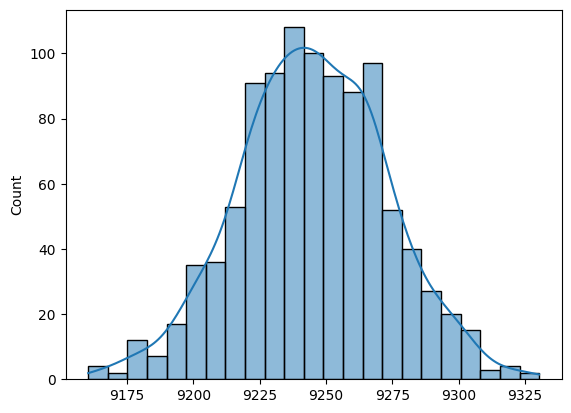

Category:Age group '26-35'
Sample Size:30000
Confidence level:95% 



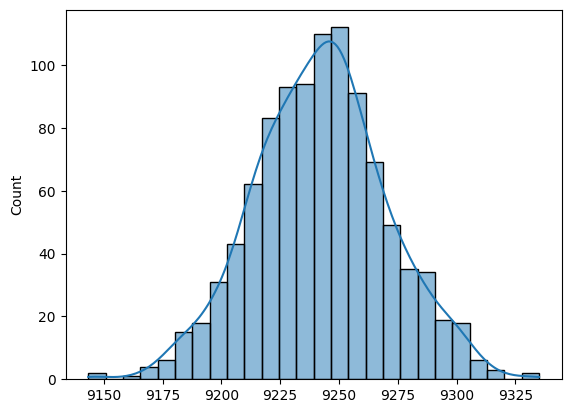

Category:Age group '26-35'
Sample Size:30000
Confidence level:99% 



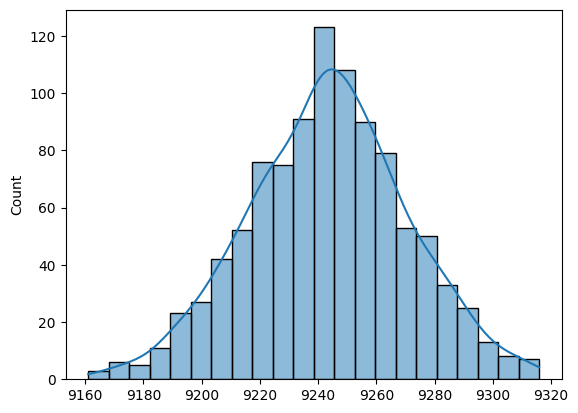

In [ ]:
for j in [90,95,99]:
    hist_fun(dfa3, 30000, 1000, j, "Age group '26-35'")

##4.Age group '36-45'

Effect of Sample Size on Confidence Interval


In [ ]:
for i in [300,3000,30000,len(dfa4)]:
    calculate_ci(dfa4, i, 1000, 95, "Age group '36-45'")

Confidence Interval for average amount spent by 'Age group '36-45'' with sample size 300 and 95% confidence: (8780.238666666666,9867.6985)
Confidence Interval for average amount spent by 'Age group '36-45'' with sample size 3000 and 95% confidence: (9159.360458333333,9487.150108333333)
Confidence Interval for average amount spent by 'Age group '36-45'' with sample size 30000 and 95% confidence: (9267.750930833334,9379.196425)
Confidence Interval for average amount spent by 'Age group '36-45'' with sample size 110013 and 95% confidence: (9295.238848136129,9350.162865297738)


Effect of Confidence levels on Confidence Intervals


In [ ]:
for j in [90,95,99]:
    calculate_ci(dfa4, 30000, 1000, j, "Age group '36-45'")

Confidence Interval for average amount spent by 'Age group '36-45'' with sample size 30000 and 90% confidence: (9279.953766666666,9368.808256666667)
Confidence Interval for average amount spent by 'Age group '36-45'' with sample size 30000 and 95% confidence: (9270.369689166666,9374.0766775)
Confidence Interval for average amount spent by 'Age group '36-45'' with sample size 30000 and 99% confidence: (9245.197450833333,9388.668704833333)


Effect of Sample Size on Distribution


Category:Age group '36-45'
Sample Size:300
Confidence level:95% 



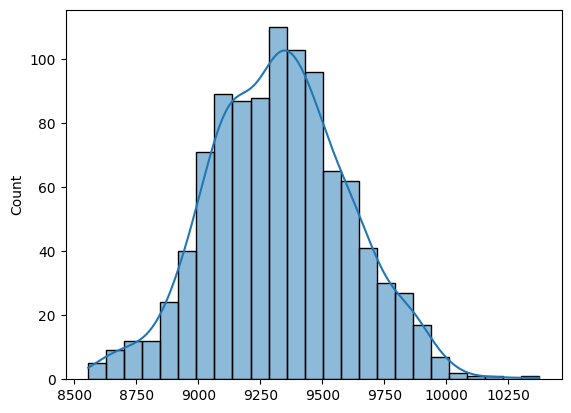

Category:Age group '36-45'
Sample Size:3000
Confidence level:95% 



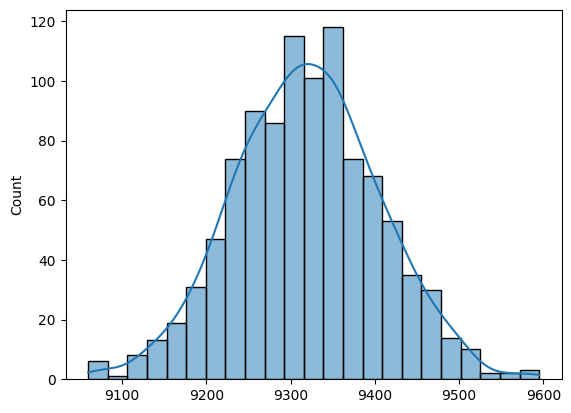

Category:Age group '36-45'
Sample Size:30000
Confidence level:95% 



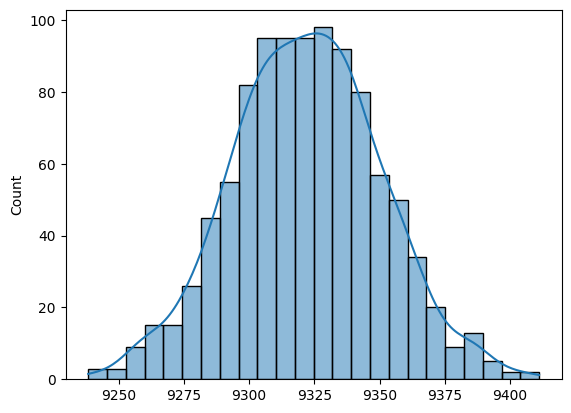

Category:Age group '36-45'
Sample Size:110013
Confidence level:95% 



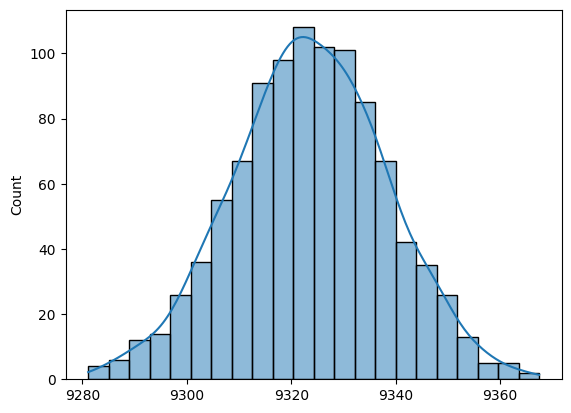

In [ ]:
for i in [300,3000,30000,len(dfa4)]:
    hist_fun(dfa4, i, 1000, 95, "Age group '36-45'")

Effect of Confidence levels on Distribution

Category:Age group '36-45'
Sample Size:30000
Confidence level:90% 



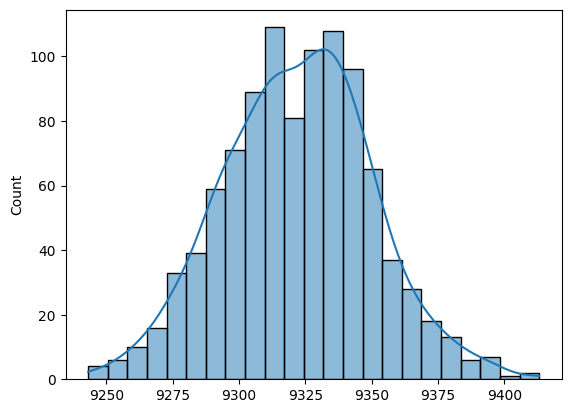

Category:Age group '36-45'
Sample Size:30000
Confidence level:95% 



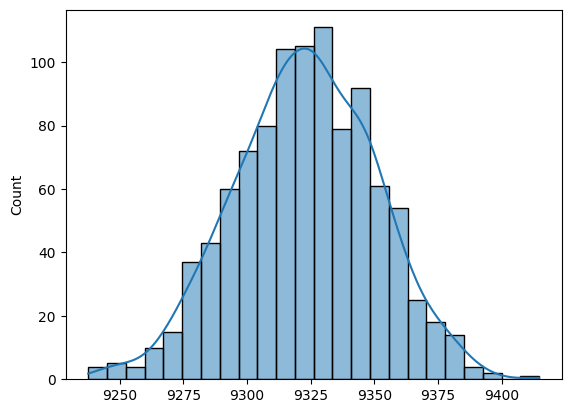

Category:Age group '36-45'
Sample Size:30000
Confidence level:99% 



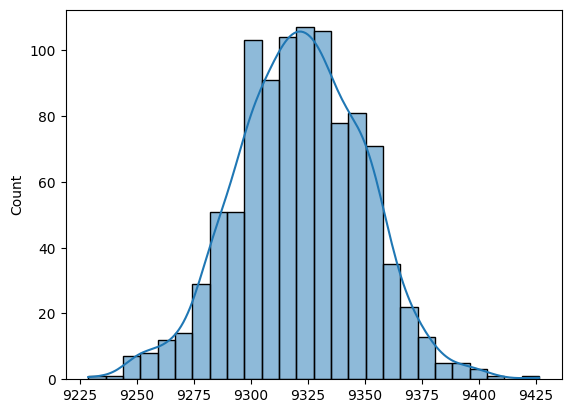

In [ ]:
for j in [90,95,99]:
    hist_fun(dfa4, 30000, 1000, j, "Age group '36-45'")

##5.Age group '46-50'

Effect of Sample Size on Confidence Interval


In [ ]:
for i in [300,3000,30000,len(dfa5)]:
    calculate_ci(dfa5, i, 1000, 95, "Age group '46-50'")

Confidence Interval for average amount spent by 'Age group '46-50'' with sample size 300 and 95% confidence: (8682.131083333334,9766.230416666667)
Confidence Interval for average amount spent by 'Age group '46-50'' with sample size 3000 and 95% confidence: (9026.931325000001,9367.224216666667)
Confidence Interval for average amount spent by 'Age group '46-50'' with sample size 30000 and 95% confidence: (9149.371089166667,9256.657918333334)
Confidence Interval for average amount spent by 'Age group '46-50'' with sample size 45701 and 95% confidence: (9160.241662655084,9245.596692632545)


Effect of Confidence levels on Confidence Intervals


In [ ]:
for j in [90,95,99]:
    calculate_ci(dfa5, 30000, 1000, j, "Age group '46-50'")

Confidence Interval for average amount spent by 'Age group '46-50'' with sample size 30000 and 90% confidence: (9159.109543333334,9251.351028333334)
Confidence Interval for average amount spent by 'Age group '46-50'' with sample size 30000 and 95% confidence: (9152.049438333333,9257.2212825)
Confidence Interval for average amount spent by 'Age group '46-50'' with sample size 30000 and 99% confidence: (9136.362014,9266.899927333334)


Effect of Sample Size on Distribution


Category:Age group '46-50'
Sample Size:300
Confidence level:95% 



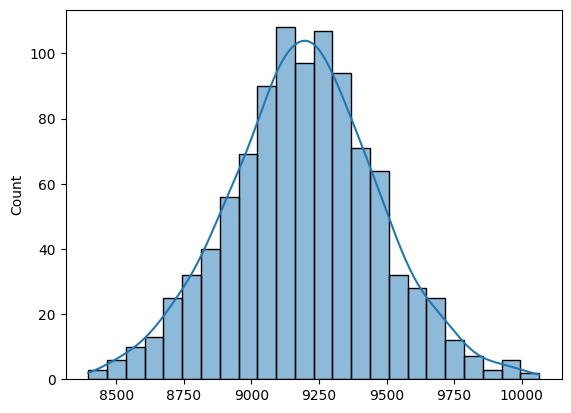

Category:Age group '46-50'
Sample Size:3000
Confidence level:95% 



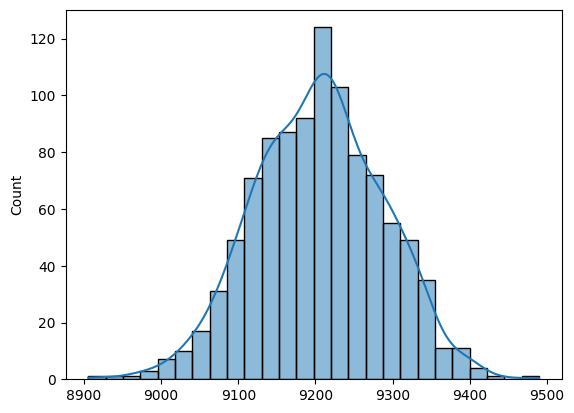

Category:Age group '46-50'
Sample Size:30000
Confidence level:95% 



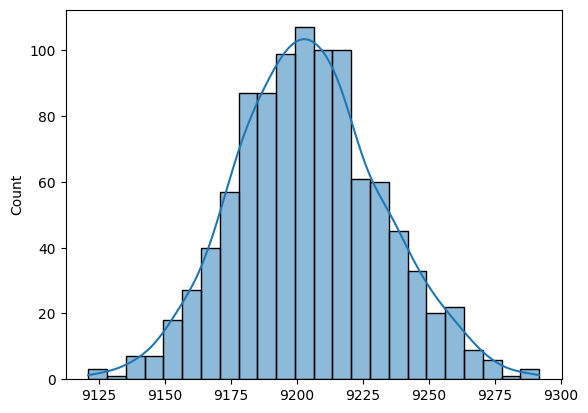

Category:Age group '46-50'
Sample Size:45701
Confidence level:95% 



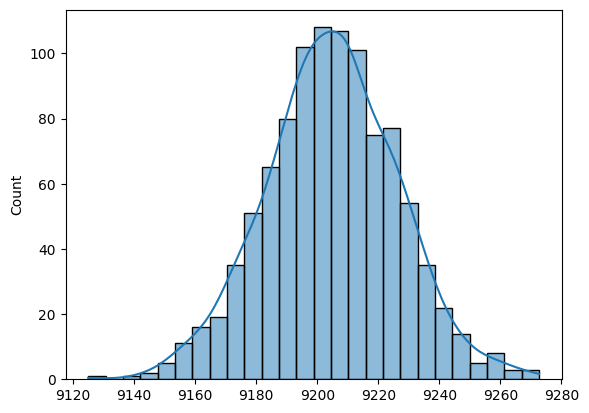

In [ ]:
for i in [300,3000,30000,len(dfa5)]:
    hist_fun(dfa5, i, 1000, 95, "Age group '46-50'")

Effect of Confidence levels on Distribution

Category:Age group '46-50'
Sample Size:30000
Confidence level:90% 



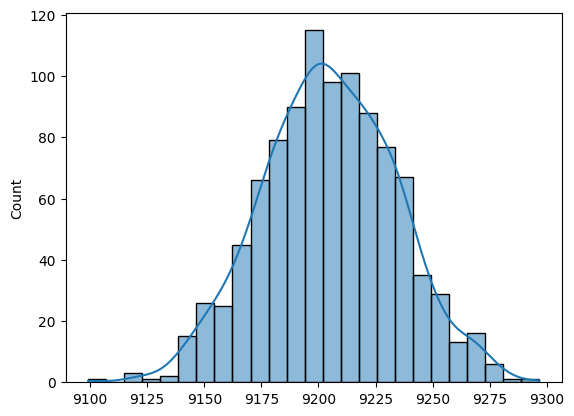

Category:Age group '46-50'
Sample Size:30000
Confidence level:95% 



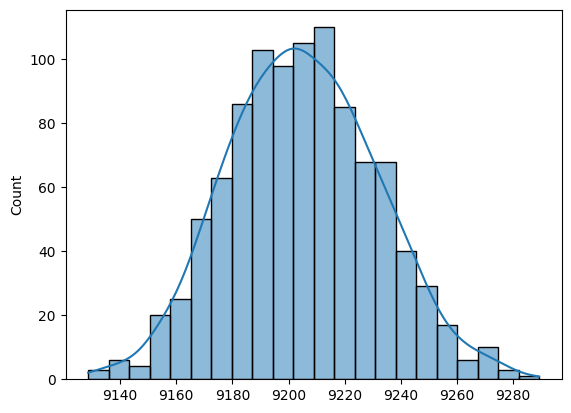

Category:Age group '46-50'
Sample Size:30000
Confidence level:99% 



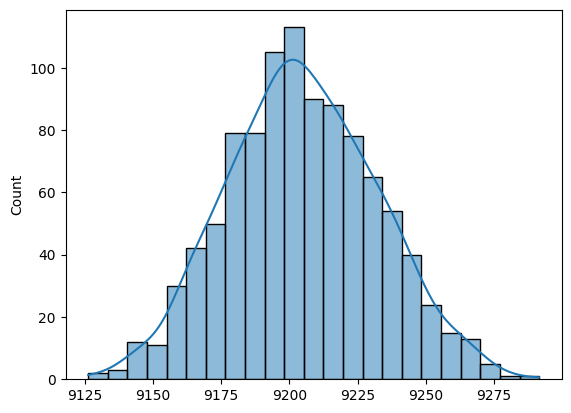

In [ ]:
for j in [90,95,99]:
    hist_fun(dfa5, 30000, 1000, j, "Age group '46-50'")

##6.Age group '51-55'

Effect of Sample Size on Confidence Interval


In [ ]:
for i in [300,3000,30000,len(dfa6)]:
    calculate_ci(dfa6, i, 1000, 95, "Age group '51-55'")

Confidence Interval for average amount spent by 'Age group '51-55'' with sample size 300 and 95% confidence: (8956.500166666667,10061.19925)
Confidence Interval for average amount spent by 'Age group '51-55'' with sample size 3000 and 95% confidence: (9352.0923,9696.9279)
Confidence Interval for average amount spent by 'Age group '51-55'' with sample size 30000 and 95% confidence: (9460.13326,9572.511580833332)
Confidence Interval for average amount spent by 'Age group '51-55'' with sample size 38501 and 95% confidence: (9465.620671540999,9561.152939534037)


Effect of Confidence levels on Confidence Intervals


In [ ]:
for j in [90,95,99]:
    calculate_ci(dfa6, 30000, 1000, j, "Age group '51-55'")

Confidence Interval for average amount spent by 'Age group '51-55'' with sample size 30000 and 90% confidence: (9468.327661666666,9563.674504999999)
Confidence Interval for average amount spent by 'Age group '51-55'' with sample size 30000 and 95% confidence: (9459.134155833333,9569.241249166667)
Confidence Interval for average amount spent by 'Age group '51-55'' with sample size 30000 and 99% confidence: (9448.082465333333,9588.686285166666)


Effect of Sample Size on Distribution


Category:Age group '51-55'
Sample Size:300
Confidence level:95% 



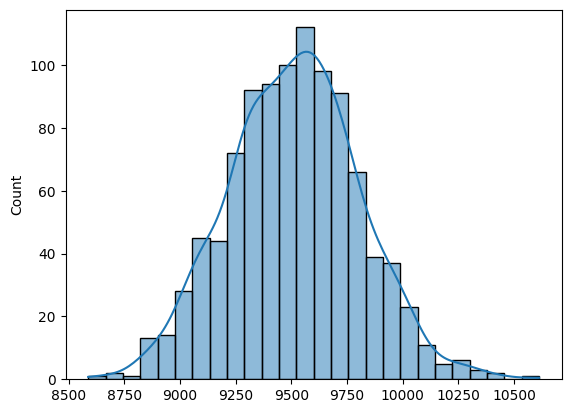

Category:Age group '51-55'
Sample Size:3000
Confidence level:95% 



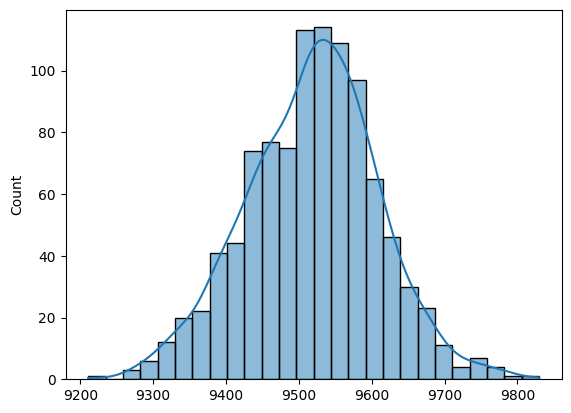

Category:Age group '51-55'
Sample Size:30000
Confidence level:95% 



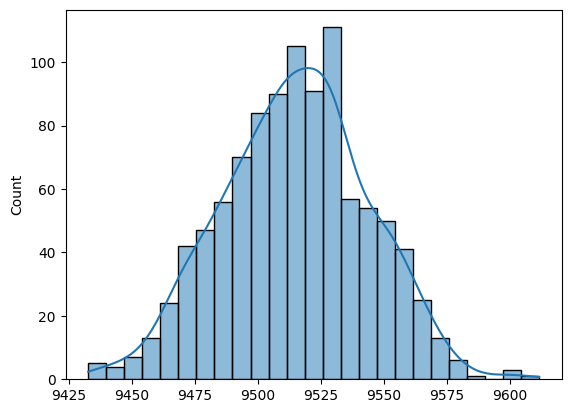

Category:Age group '51-55'
Sample Size:38501
Confidence level:95% 



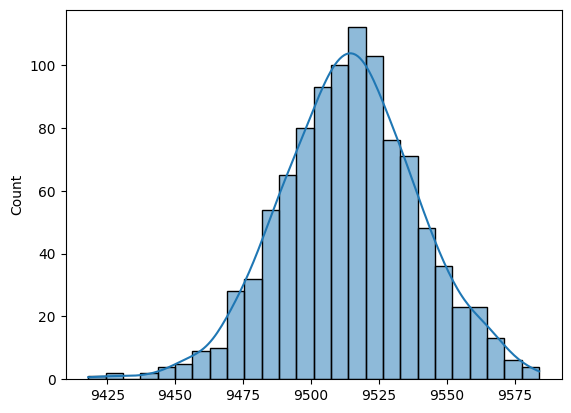

In [ ]:
for i in [300,3000,30000,len(dfa6)]:
    hist_fun(dfa6, i, 1000, 95, "Age group '51-55'")

Effect of Confidence levels on Distribution

Category:Age group '51-55'
Sample Size:30000
Confidence level:90% 



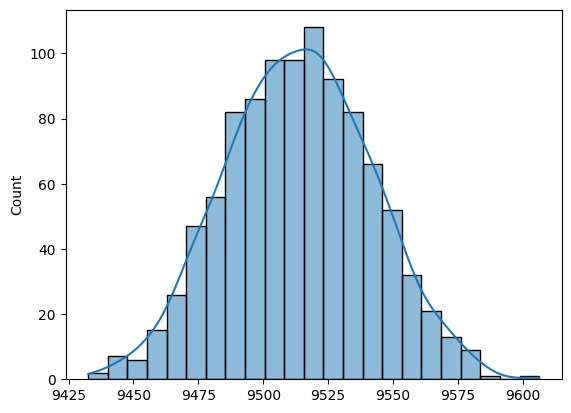

Category:Age group '51-55'
Sample Size:30000
Confidence level:95% 



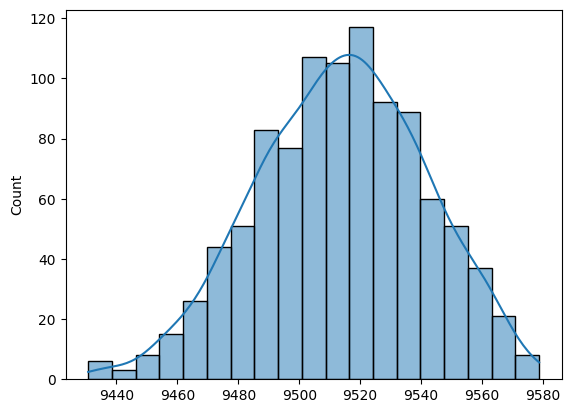

Category:Age group '51-55'
Sample Size:30000
Confidence level:99% 



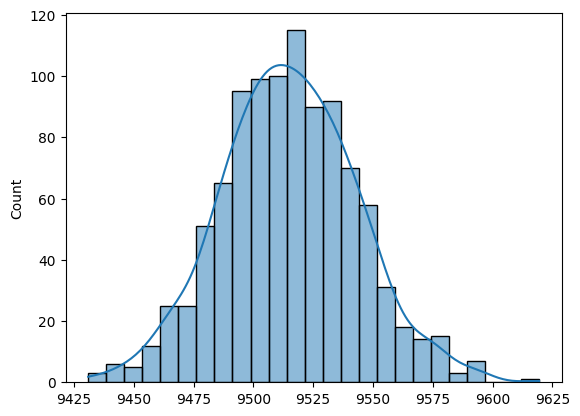

In [ ]:
for j in [90,95,99]:
    hist_fun(dfa6, 30000, 1000, j, "Age group '51-55'")

##7.Age group '55+'

Effect of Sample Size on Confidence Interval

In [ ]:
for i in [300,3000,30000,len(dfa7)]:
    calculate_ci(dfa7, i, 1000, 95, "Age group '55+''")

Confidence Interval for average amount spent by 'Age group '55+''' with sample size 300 and 95% confidence: (8811.222416666667,9872.09375)
Confidence Interval for average amount spent by 'Age group '55+''' with sample size 3000 and 95% confidence: (9152.700850000001,9492.326558333334)
Confidence Interval for average amount spent by 'Age group '55+''' with sample size 30000 and 95% confidence: (9274.338845,9378.095)
Confidence Interval for average amount spent by 'Age group '55+''' with sample size 21504 and 95% confidence: (9265.881295340401,9391.048670014881)


Effect of Confidence levels on Confidence Intervals

In [ ]:
for j in [90,95,99]:
  calculate_ci(dfa7, 30000, 1000, j, "Age group '55+''")

Confidence Interval for average amount spent by 'Age group '55+''' with sample size 30000 and 90% confidence: (9279.564339999999,9373.126603333334)
Confidence Interval for average amount spent by 'Age group '55+''' with sample size 30000 and 95% confidence: (9271.1280475,9383.303556666668)
Confidence Interval for average amount spent by 'Age group '55+''' with sample size 30000 and 99% confidence: (9258.348527833334,9393.862872833333)


Effect of Sample Size on Distribution

Category:Age group '55+'
Sample Size:300
Confidence level:95% 



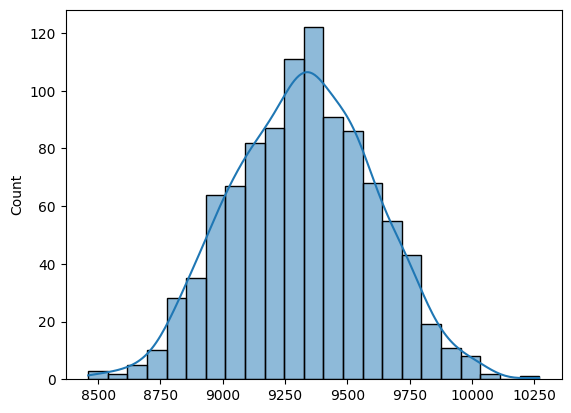

Category:Age group '55+'
Sample Size:3000
Confidence level:95% 



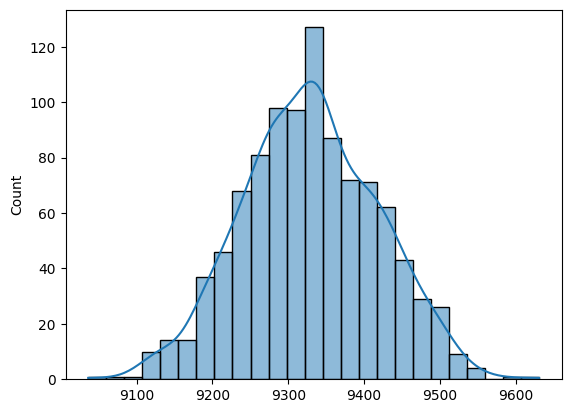

Category:Age group '55+'
Sample Size:30000
Confidence level:95% 



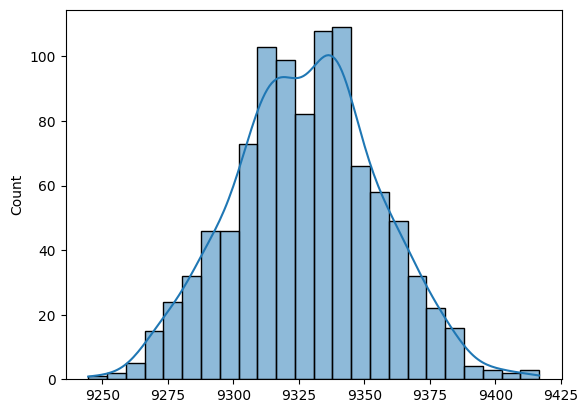

Category:Age group '55+'
Sample Size:21504
Confidence level:95% 



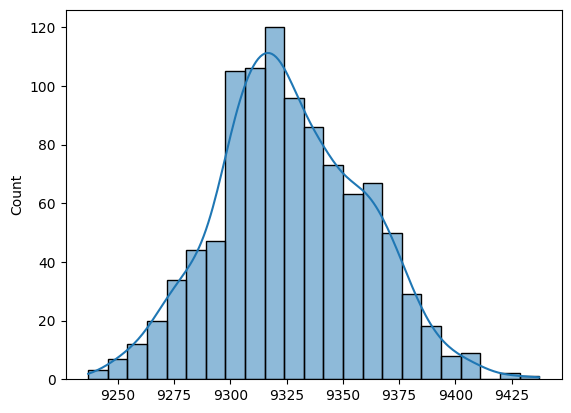

In [ ]:
for i in [300,3000,30000,len(dfa7)]:
    hist_fun(dfa7, i, 1000, 95, "Age group '55+'")

Effect of Confidence levels on Distribution

Category:Age group '55+'
Sample Size:30000
Confidence level:90% 



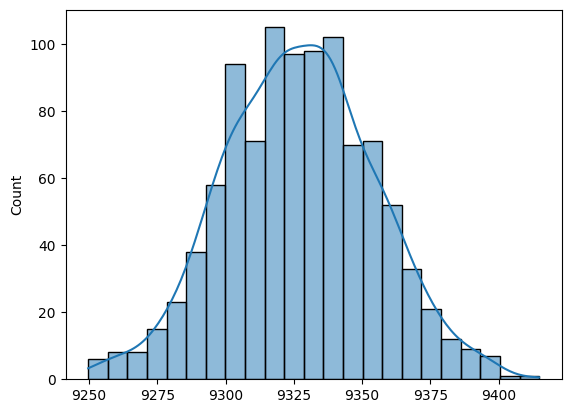

Category:Age group '55+'
Sample Size:30000
Confidence level:95% 



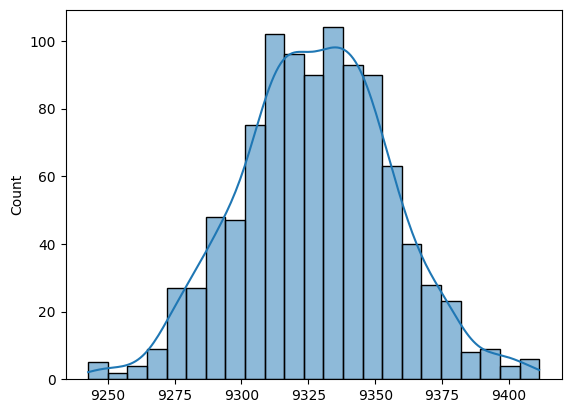

Category:Age group '55+'
Sample Size:30000
Confidence level:99% 



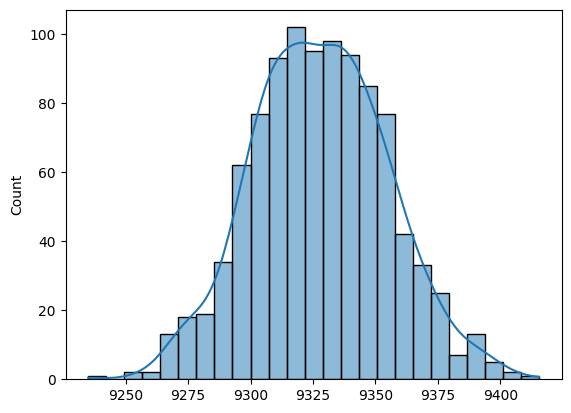

In [ ]:
for j in [90,95,99]:
    hist_fun(dfa7, 30000, 1000, j, "Age group '55+'")

##Comparision of different age groups

In [ ]:
calculate_ci(dfa1, len(dfa1), 1000, 95, "Age group '0-17'")
calculate_ci(dfa2, len(dfa2), 1000, 95, "Age group '18-25'")
calculate_ci(dfa3, len(dfa3), 1000, 95, "Age group '26-35'")
calculate_ci(dfa4, len(dfa4), 1000, 95, "Age group '36-45'")
calculate_ci(dfa5, len(dfa5), 1000, 95, "Age group '46-50'")
calculate_ci(dfa6, len(dfa6), 1000, 95, "Age group '51-55'")
calculate_ci(dfa7, len(dfa7), 1000, 95, "Age group '55+'")

Confidence Interval for average amount spent by 'Age group '0-17'' with sample size 15102 and 95% confidence: (8864.44039696729,9027.750643954443)
Confidence Interval for average amount spent by 'Age group '18-25'' with sample size 99660 and 95% confidence: (9139.143139674894,9196.943952689144)
Confidence Interval for average amount spent by 'Age group '26-35'' with sample size 219587 and 95% confidence: (9224.14445185735,9264.397352188425)
Confidence Interval for average amount spent by 'Age group '36-45'' with sample size 110013 and 95% confidence: (9294.457486160727,9351.973937171062)
Confidence Interval for average amount spent by 'Age group '46-50'' with sample size 45701 and 95% confidence: (9160.501831469772,9246.915407212096)
Confidence Interval for average amount spent by 'Age group '51-55'' with sample size 38501 and 95% confidence: (9464.673281213474,9561.908716007376)
Confidence Interval for average amount spent by 'Age group '55+'' with sample size 21504 and 95% confidence

### Observations on Age Group Purchases and Comparison

*   **Age Group Distribution:** The most frequent age group in the dataset is **26-35**, followed by 36-45 and 18-25. The 0-17 and 55+ age groups have fewer purchases.
*   **Descriptive Statistics and Distribution:** The descriptive statistics, box plot, and displot/histplot show that:
    *   The mean purchase amounts vary across age groups, with the **51-55 age group having the highest average purchase** (approx. 9514.86) and the 0-17 age group having the lowest (approx. 8940.65).
    *   The standard deviations and distribution shapes of purchase amounts appear somewhat similar across age groups after clipping.
*   **Bootstrapping Analysis (Individual Age Groups):** Similar to the Gender and Marital Status analysis, the bootstrapping performed on purchase data for each age group across various sample sizes (300, 3000, 30000, full dataset) and confidence levels (90%, 95%, 99%) demonstrates the principles of the **Central Limit Theorem** and how sample size and confidence level affect the confidence interval width and the distribution of sample means.
*  As sample size increases, the CI width decreases and the sample mean distribution becomes more normal and less spread. As confidence level increases, the CI width increases.
*   **Comparison of Average Purchase Amount (Different Age Groups):** Based on the 95% confidence intervals for the average amount spent by different age groups, computed using the entire dataset:
    *   The 95% confidence intervals for the average purchase amount across the age groups are:
        *   0-17: (8864.44, 9027.75)
        *   18-25: (9139.14, 9196.94)
        *   26-35: (9224.14, 9264.40)
        *   36-45: (9294.46, 9351.97)
        *   46-50: (9160.50, 9246.92)
        *   51-55: (9464.67, 9561.91)
        *   55+: (9262.67, 9392.70)
*   **Observation on Overlap:** Examining these confidence intervals, we can observe overlaps between several adjacent age groups (e.g., 18-25 and 26-35, 26-35 and 36-45, 36-45 and 55+). However, there appear to be **non-overlaps** between more distant age groups, particularly between the youngest group (0-17) and older groups (e.g., 26-35, 36-45, 51-55, 55+), and between the highest spending group (51-55) and several younger groups (0-17, 18-25, 26-35, 46-50).

* The overlap of the 95% confidence intervals suggests that while there might not be a statistically significant difference in average spending between some adjacent age groups. Also, there are likely **statistically significant differences in average purchase amount between certain distinct age groups** at the 95% confidence level.

# **Business Insights**

*   **Customer Demographics:** The customer base is predominantly **male** and the most active age group is **26-35**. City Category B has the highest number of transactions. Unmarried customers make more purchases in total, but this is likely due to their larger proportion in the dataset rather than higher individual spending power.
*   **Spending Power by Gender and Age:**
    *   There is a **statistically significant difference in average spending between genders**, with **males spending significantly more on average** per transaction than females.
    *   Average spending varies by age group, with the **51-55 age group showing the highest average purchase amount**. The youngest age groups (0-17 and 18-25) tend to have lower average spending.
    *   While there are some overlaps in average spending between adjacent age groups, there are **statistically significant differences in average spending between more distinct age groups** (e.g., younger vs. older groups).
*   **Product Preferences:**
    *   Product Categories **5, 1, and 8 are the most popular overall**.
    *   There are distinct gender preferences within the top categories: **Females most prefer Product Category 5**, while **Males most prefer Product Category 1**. Both show high interest in categories 1, 5, and 8, but in different orders of preference.
    *   Product category preferences also vary somewhat by age group, although categories 1, 5, and 8 remain popular across most age brackets. The 55+ age group shows a preference for Product Category 8.
*   **Marital Status and Spending:** There is **no statistically significant difference in the average amount spent** between Married and Unmarried customers. The slight difference observed in sample means is likely due to random variation.
*   **Data Quality:** The dataset is clean with no missing values or duplicate rows, which is ideal for reliable analysis. Outliers were present in purchase amounts but were handled appropriately through clipping to mitigate their impact on analyses of central tendency without removing valuable data points.
*   **Confidence in Estimates:** The bootstrapping analysis confirms that with larger sample sizes, our estimates of the average purchase amount for different groups become more precise (narrower confidence intervals), and the distribution of sample means approaches normality, supporting the use of inferential statistics. The confidence intervals provide a reliable range within which the true population average spending for each group is likely to fall.

#**Recommendations for Walmart**

1.  **Targeted Marketing Campaigns based on Gender and Age:**
    *   Given the statistically significant difference in average spending, with males spending more, consider developing targeted marketing campaigns or promotions specifically appealing to male customers to further increase their purchase value.
    *   Tailor marketing messages and product highlights to specific age groups, recognizing the higher average spending in the 51-55 age group and potentially lower spending in the youngest groups. For instance, campaigns for the 51-55 age group could focus on higher-value items, while campaigns for younger groups might emphasize value or popular products within their preferred categories.
2.  **Optimize Product placement and Placement based on Gender and Age Preferences:**
    *   Ensure adequate stocking and prominent placement of Product Categories 1, 5, and 8, as they are the most popular overall.
    *   Within these popular categories, consider gender-specific preferences (Category 5 for females, Category 1 for males) for targeted promotions or in-store displays.
    *   For age groups, use the product category preference data (e.g., 55+ preference for Category 8) to tailor product availability and marketing within stores catering to different age demographics.
3.  **Leverage Insights from High-Spending Age Group (51-55):** Analyze the purchasing behavior of the 51-55 age group in more detail. Identify common product combinations or shopping patterns within this group to inform cross-selling strategies and optimize the shopping experience for this valuable segment.
4.  **Consider City Category B Focus:** Given the highest number of purchases in City Category B, further analyze the specific characteristics of customers and popular products in these locations to tailor inventory and marketing efforts effectively.
5.  **Acknowledge Marital Status Similarity in Average Spending:** Since there is no statistically significant difference in average spending based on marital status, broad marketing strategies focused solely on marital status for average purchase value might not be as effective. Focus on other demographics like age and gender for targeted spending-related campaigns.
6.  **Utilize Confidence Intervals for Data-Driven Decisions:** Use the calculated confidence intervals as a tool to understand the uncertainty in average spending estimates for different customer segments. This can help in setting realistic sales targets and evaluating the potential impact of marketing initiatives. For example, the non-overlapping intervals for gender provide strong evidence to support gender-based strategies for increasing average transaction value.
7.  **Address Lower-Spending Demographic Groups:** Develop strategies to understand and potentially increase engagement and average purchase amount among lower-spending groups, such as the youngest age groups (0-17, 18-25) and female customers. This could involve targeted promotions, understanding their specific needs and preferences, or optimizing product offerings that appeal more to these segments.